In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#import the data
df = pd.read_excel(r"C:\Users\banav\Desktop\INTERNSHIP\data\data.xlsx")

In [3]:
pd.set_option("display.max_columns",40)

In [4]:
#display the head
df.head()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,"board ofsecondary education,ap",2007,95.8,"board of intermediate education,ap",1141,2,B.Tech/B.E.,computer engineering,78.00,1141,0,Andhra Pradesh,2011,515,585,525,0.635979,445,-1,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,cbse,2007,85.0,cbse,5807,2,B.Tech/B.E.,electronics and communication engineering,70.06,5807,0,Madhya Pradesh,2012,695,610,780,0.960603,-1,466,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,cbse,2010,68.2,cbse,64,2,B.Tech/B.E.,information technology,70.00,64,0,Uttar Pradesh,2014,615,545,370,0.450877,395,-1,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,cbse,2007,83.6,cbse,6920,1,B.Tech/B.E.,computer engineering,74.64,6920,1,Delhi,2011,635,585,625,0.974396,615,-1,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,cbse,2008,76.8,cbse,11368,2,B.Tech/B.E.,electronics and communication engineering,73.90,11368,0,Uttar Pradesh,2012,545,625,465,0.124502,-1,233,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [5]:
#display the shape
df.shape

(3998, 39)

In [6]:
#display info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             3998 non-null   object        
 1   ID                     3998 non-null   int64         
 2   Salary                 3998 non-null   int64         
 3   DOJ                    3998 non-null   datetime64[ns]
 4   DOL                    3998 non-null   object        
 5   Designation            3998 non-null   object        
 6   JobCity                3998 non-null   object        
 7   Gender                 3998 non-null   object        
 8   DOB                    3998 non-null   datetime64[ns]
 9   10percentage           3998 non-null   float64       
 10  10board                3998 non-null   object        
 11  12graduation           3998 non-null   int64         
 12  12percentage           3998 non-null   float64       
 13  12b

In [7]:
#removing unwanted columns
df.drop(['Unnamed: 0', 'CollegeID','ID'], axis=1, inplace=True)

In [8]:
#checking null values
df.isnull().sum()

Salary                   0
DOJ                      0
DOL                      0
Designation              0
JobCity                  0
Gender                   0
DOB                      0
10percentage             0
10board                  0
12graduation             0
12percentage             0
12board                  0
CollegeTier              0
Degree                   0
Specialization           0
collegeGPA               0
CollegeCityID            0
CollegeCityTier          0
CollegeState             0
GraduationYear           0
English                  0
Logical                  0
Quant                    0
Domain                   0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
conscientiousness        0
agreeableness            0
extraversion             0
nueroticism              0
openess_to_experience    0
dtype: int64

In [9]:
#checking duplicates
df.duplicated().sum()

0

### <span style='color:red'>1. DATATYPE CONVERSIONS</span>

##### <span style='color:blue'>DOL</span>

In [10]:
#df['DOL'] = pd.to_datetime(df['DOL']) --> error

- the observation is the column has string as "present" so first need to convert them to some date

In [11]:
df['DOL'] = df['DOL'].replace('present','2015-12-31')

- as the data is 2015 if we convert to present date it make doesn't sense so converted them to last date of 2015

In [12]:
df['DOL'] = pd.to_datetime(df['DOL'])

##### <span style='color:blue'>CollegeTier ,CollegeCityTier</span>

In [13]:
covert_to_object_cols = ['CollegeTier','CollegeCityTier']
for object in covert_to_object_cols:
    df[object] = df[object].astype('object')

In [14]:
#Data frame with perfect dtypes
df.head()

,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,420000,2012-06-01,2015-12-31,senior quality engineer,Bangalore,f,1990-02-19,84.3,"board ofsecondary education,ap",2007,95.8,"board of intermediate education,ap",2,B.Tech/B.E.,computer engineering,78.00,1141,0,Andhra Pradesh,2011,515,585,525,0.635979,445,-1,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,500000,2013-09-01,2015-12-31,assistant manager,Indore,m,1989-10-04,85.4,cbse,2007,85.0,cbse,2,B.Tech/B.E.,electronics and communication engineering,70.06,5807,0,Madhya Pradesh,2012,695,610,780,0.960603,-1,466,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,325000,2014-06-01,2015-12-31,systems engineer,Chennai,f,1992-08-03,85.0,cbse,2010,68.2,cbse,2,B.Tech/B.E.,information technology,70.00,64,0,Uttar Pradesh,2014,615,545,370,0.450877,395,-1,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,1100000,2011-07-01,2015-12-31,senior software engineer,Gurgaon,m,1989-12-05,85.6,cbse,2007,83.6,cbse,1,B.Tech/B.E.,computer engineering,74.64,6920,1,Delhi,2011,635,585,625,0.974396,615,-1,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,200000,2014-03-01,2015-03-01,get,Manesar,m,1991-02-27,78.0,cbse,2008,76.8,cbse,2,B.Tech/B.E.,electronics and communication engineering,73.90,11368,0,Uttar Pradesh,2012,545,625,465,0.124502,-1,233,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


### <span style='color:red'> 2.COLUMN CLEANING, NON VISUAL AND VISUAL UNIVARIATE ANALYSIS </span>

### <span style='color:blue'>2.1 Salary</span>

#### <span style='color:brown'> Data cleaning on Salary cloumn </span>

In [15]:
df['Salary'].dtype

dtype('int64')

In [16]:
df['Salary'].isnull().sum()

0

- no cleaning occur in salary column

#### <span style='color:brown'> Non visual analysis on Salary cloumn </span>

In [17]:
print("*"*10, "Salary" , "*"*10)
print(df['Salary'].agg(['count','min', 'max', 'mean', 'median', 'std','skew','kurt']).round())
print()

********** Salary **********
count        3998.0
min         35000.0
max       4000000.0
mean       307700.0
median     300000.0
std        212737.0
skew            6.0
kurt           81.0
Name: Salary, dtype: float64



#### <span style='color:brown'> Visual analysis on Salary cloumn </span>

Text(300000.0, 0.5, 'meadian = 300000 😢')

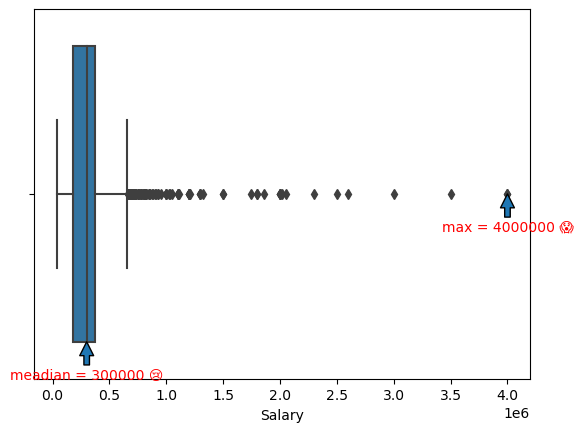

In [18]:
sns.boxplot(x = 'Salary',data = df)

# Annotate max with arrow
plt.annotate("max = 4000000 😱",
             xy=(df['Salary'].max(), 0), 
             xytext=(df['Salary'].max(),0.1),
             arrowprops={"width":4,"headwidth":10,'headlength':10},
             color='RED',
             fontsize=10, ha='center')


# Annotate medain with arrow
plt.annotate("meadian = 300000 😢",
             xy=(df['Salary'].median(), 0.4), 
             xytext=(df['Salary'].median(),0.5),
             arrowprops={"width":4,"headwidth":10,'headlength':10},
             color='RED',
             fontsize=10, ha='center')

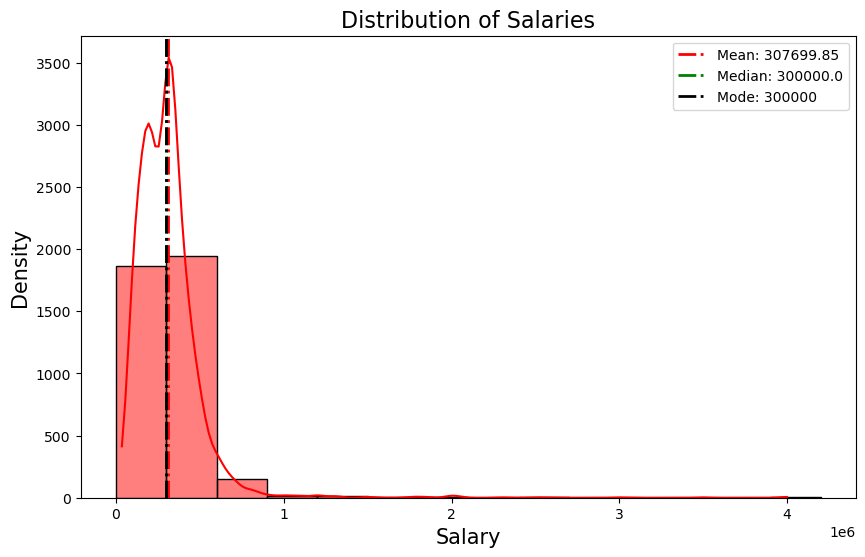

In [19]:
plt.figure(figsize=(10, 6))

sns.histplot(df['Salary'], bins=np.arange(0, df['Salary'].max() + 300000, 300000), kde=True, color='red')

# Plot vertical lines for mean, median, and mode
plt.axvline(df['Salary'].mean(), color='red', linestyle='-.', linewidth=2, label=f"Mean: {round(df['Salary'].mean(), 2)}")
plt.axvline(df['Salary'].median(), color='green', linestyle='-.', linewidth=2, label=f"Median: {round(df['Salary'].median(), 2)}")
plt.axvline(df['Salary'].mode()[0], color='black', linestyle='-.', linewidth=2, label=f"Mode: {round(df['Salary'].mode()[0], 2)}")

# Set labels and title
plt.xlabel('Salary', size=15)
plt.ylabel('Density', size=15)
plt.title('Distribution of Salaries', size=16)

# Show legend
plt.legend()

# Show plot
plt.show()

⭐OBSERVATION OF **SALARY** COLUMN:

<div style = 'background:skyblue'>
    
* `MEDIAN` : A maximum number of people are getting 3 - 3.1 lakhs.
   *
* `SKEWNESS`: A skewness of 6.0 indicates that the distribution is highly skewed to the right (positively skewed), meaning that there are a few extremely high salaries that are pulling the mean to the right.</div>

### <span style='color:blue'>2.2 Gender</span>

#### <span style='color:brown'> Cloumn cleaning on Gender cloumn </span>

In [20]:
df['Gender'].isnull().sum()

0

- no need of any column cleaning here

#### <span style='color:brown'> Non visual analysis on Gender cloumn </span>

In [21]:
print("*"*10, "Gender", "*"*10)
print(df['Gender'].agg(['count', 'nunique', 'unique']))
print('Value Counts: \n', df['Gender'].value_counts(normalize = True)*100)
print()

********** Gender **********
count        3998
nunique         2
unique     [f, m]
Name: Gender, dtype: object
Value Counts: 
 m    76.063032
f    23.936968
Name: Gender, dtype: float64



#### <span style='color:brown'> Visual analysis on Gender cloumn </span>

<Axes: xlabel='Gender', ylabel='count'>

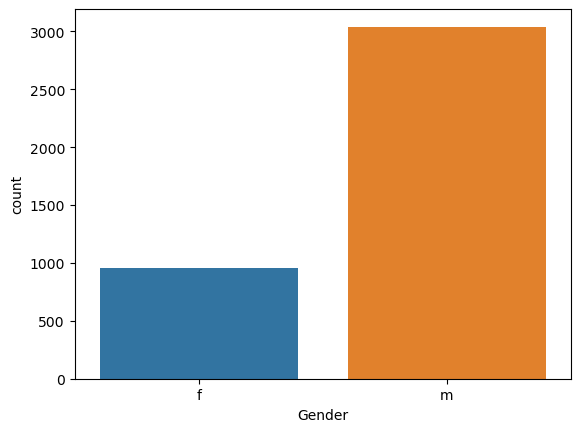

In [22]:
sns.countplot(x='Gender', data=df)

⭐OBSERVATION OF **GENDER** COLUMN:

<div style = 'background:skyblue'>
*
    
* `76% students` who took AMCAT exam are m (male)
    
*</div>

### <span style='color:blue'>2.3 10percentage</span>

#### <span style='color:brown'> Cloumn cleaning on 10percentage cloumn </span>

In [23]:
df['10percentage'].dtype

dtype('float64')

In [24]:
df['10percentage'].isnull().sum()

0

In [25]:
df['10percentage'].describe()

count    3998.000000
mean       77.925443
std         9.850162
min        43.000000
25%        71.680000
50%        79.150000
75%        85.670000
max        97.760000
Name: 10percentage, dtype: float64

- no cleaning occur for this column

#### <span style='color:brown'> Non visual analysis on 10percentage cloumn </span>

In [26]:
print("*"*10, "10percentage" , "*"*10)
print(df['10percentage'].agg(['count','min', 'max', 'mean', 'median', 'std','skew','kurt']))
print()

********** 10percentage **********
count     3998.000000
min         43.000000
max         97.760000
mean        77.925443
median      79.150000
std          9.850162
skew        -0.591019
kurt        -0.110284
Name: 10percentage, dtype: float64



#### <span style='color:brown'> visual analysis on 10percentage cloumn </span>

Text(43.0, 0.2, 'min = 43.0 😢')

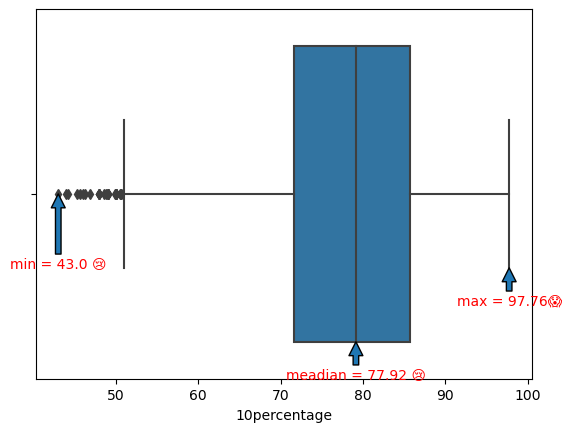

In [27]:
sns.boxplot(x = '10percentage',data = df)

# Annotate max with arrow
plt.annotate("max = 97.76😱",
             xy=(df['10percentage'].max(), 0.2), 
             xytext=(df['10percentage'].max(),0.3),
             arrowprops={"width":4,"headwidth":10,'headlength':10},
             color='Red',
             fontsize=10, ha='center')


# Annotate medain with arrow
plt.annotate("meadian = 77.92 😢",
             xy=(df['10percentage'].median(), 0.4), 
             xytext=(df['10percentage'].median(),0.5),
             arrowprops={"width":4,"headwidth":10,'headlength':10},
             color='Red',
             fontsize=10, ha='center')

# Annotate mean with arrow
plt.annotate("min = 43.0 😢",
             xy=(df['10percentage'].min(), 0), 
             xytext=(df['10percentage'].min(),0.2),
             arrowprops={"width":4,"headwidth":10,'headlength':10},
             color='Red',
             fontsize=10, ha='center')

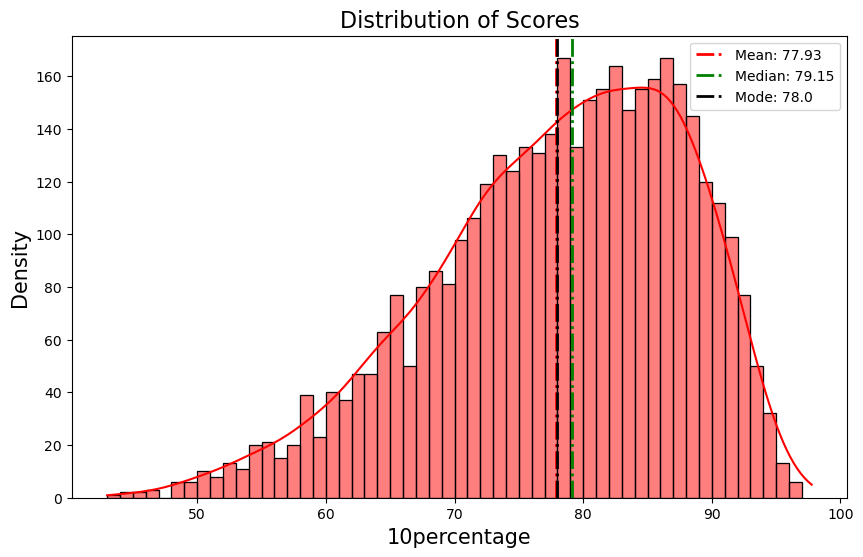

In [235]:
plt.figure(figsize=(10, 6))

sns.histplot(df['10percentage'], bins=np.arange(df['10percentage'].min(), df['10percentage'].max()), kde=True,color = 'red' )

# Plot vertical lines for mean, median, and mode
plt.axvline(df['10percentage'].mean(), color='red', linestyle='-.', linewidth=2, label=f"Mean: {round(df['10percentage'].mean(), 2)}")
plt.axvline(df['10percentage'].median(), color='green', linestyle='-.', linewidth=2, label=f"Median: {round(df['10percentage'].median(), 2)}")
plt.axvline(df['10percentage'].mode()[0], color='black', linestyle='-.', linewidth=2, label=f"Mode: {round(df['10percentage'].mode()[0], 2)}")

# Set labels and title
plt.xlabel('10percentage', size=15)
plt.ylabel('Density', size=15)
plt.title('Distribution of Scores', size=16)

# Show legend
plt.legend()

# Show plot
plt.show()

⭐OBSERVATION OF **10percentage** COLUMN:

<div style = 'background:skyblue'>
*
    
* `SKEWNESS` : It is left skewed where mean and meadian are closer so that maximum amcat takers has good 10percentage
    
*</div>

### <span style='color:blue'>2.4 12percentage</span>

In [29]:
df['12percentage'].dtype

dtype('float64')

In [30]:
df['12percentage'].isnull().sum()

0

In [56]:
df['12percentage'].describe()

count    3998.000000
mean       74.466366
std        10.999933
min        40.000000
25%        66.000000
50%        74.400000
75%        82.600000
max        98.700000
Name: 12percentage, dtype: float64

In [57]:
print("*"*10, "12percentage" , "*"*10)
print(df['12percentage'].agg(['count','min', 'max', 'mean', 'median', 'std','skew','kurt']))
print()

********** 12percentage **********
count     3998.000000
min         40.000000
max         98.700000
mean        74.466366
median      74.400000
std         10.999933
skew        -0.032607
kurt        -0.630737
Name: 12percentage, dtype: float64



Text(40.0, 0.2, 'min = 40.0 😢')

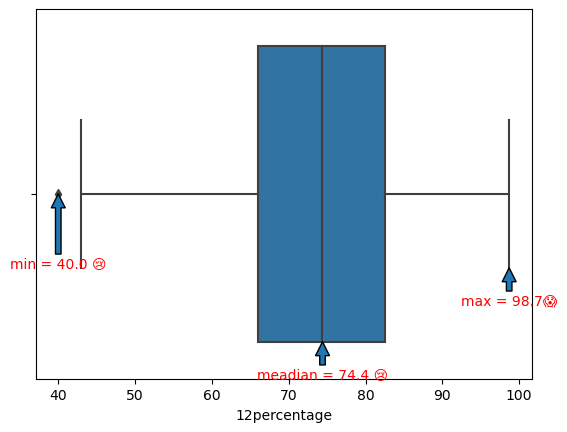

In [62]:
sns.boxplot(x = '12percentage',data = df)

# Annotate max with arrow
plt.annotate("max = 98.7😱",
             xy=(df['12percentage'].max(), 0.2), 
             xytext=(df['12percentage'].max(),0.3),
             arrowprops={"width":4,"headwidth":10,'headlength':10},
             color='Red',
             fontsize=10, ha='center')


# Annotate medain with arrow
plt.annotate("meadian = 74.4 😢",
             xy=(df['12percentage'].median(), 0.4), 
             xytext=(df['12percentage'].median(),0.5),
             arrowprops={"width":4,"headwidth":10,'headlength':10},
             color='Red',
             fontsize=10, ha='center')

# Annotate mean with arrow
plt.annotate("min = 40.0 😢",
             xy=(df['12percentage'].min(), 0), 
             xytext=(df['12percentage'].min(),0.2),
             arrowprops={"width":4,"headwidth":10,'headlength':10},
             color='Red',
             fontsize=10, ha='center')

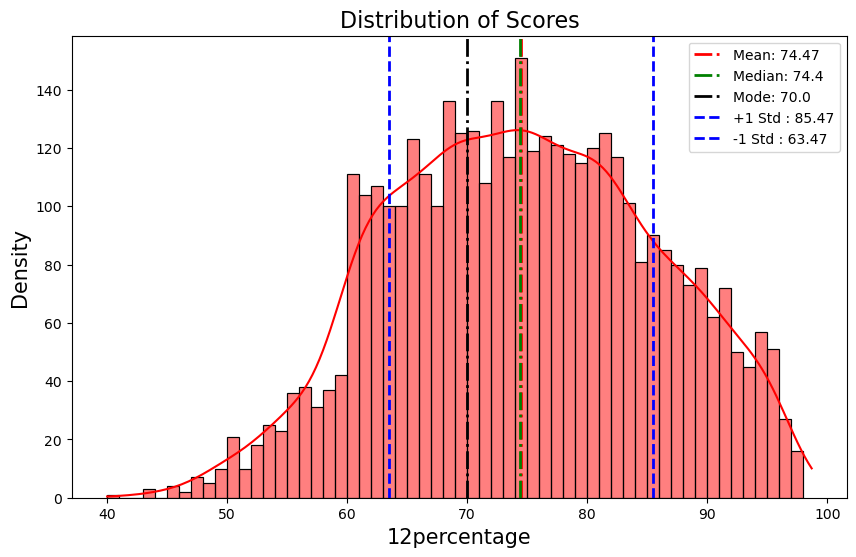

In [236]:
plt.figure(figsize=(10, 6))

sns.histplot(df['12percentage'], bins=np.arange(df['12percentage'].min(), df['12percentage'].max()), kde=True,color = 'red' )

# Plot vertical lines for mean, median, and mode
plt.axvline(df['12percentage'].mean(), color='red', linestyle='-.', linewidth=2, label=f"Mean: {round(df['12percentage'].mean(), 2)}")
plt.axvline(df['12percentage'].median(), color='green', linestyle='-.', linewidth=2, label=f"Median: {round(df['12percentage'].median(), 2)}")
plt.axvline(df['12percentage'].mode()[0], color='black', linestyle='-.', linewidth=2, label=f"Mode: {round(df['12percentage'].mode()[0], 2)}")

std = df['12percentage'].std()
plt.axvline(df['12percentage'].mean() + std, color='blue', linestyle='--', linewidth=2, label=f"+1 Std : {round(df['12percentage'].mean() + std, 2)}")
plt.axvline(df['12percentage'].mean() - std, color='blue', linestyle='--', linewidth=2, label=f"-1 Std : {round(df['12percentage'].mean() - std, 2)}")

# Set labels and title
plt.xlabel('12percentage', size=15)
plt.ylabel('Density', size=15)
plt.title('Distribution of Scores', size=16)

# Show legend
plt.legend()

# Show plot
plt.show()

⭐OBSERVATION OF **12percentage** COLUMN:

<div style = 'background:skyblue'>
*
    
* `NORMAL DISTRIBUTION` : 12percentage where mean and meadian are equal it follows roughly normal distribution where  63 - 85 percentage falls under 1 std away
    
*</div>

### <span style='color:blue'>2.5 JobCity</span>

#### <span style='color:brown'> Column Cleaning on JobCity </span>

In [31]:
df['JobCity'] = df['JobCity'].str.lower()

In [32]:
df['JobCity'].isnull().sum()

461

In [33]:
df['JobCity'].fillna('unknown',inplace = True)

In [34]:
df['JobCity'].unique()

array(['bangalore', 'indore', 'chennai', 'gurgaon', 'manesar',
       'hyderabad', 'banglore', 'noida', 'kolkata', 'pune', 'unknown',
       'mohali', 'jhansi', 'delhi', 'hyderabad ', 'bangalore ',
       'bhubaneswar', 'navi mumbai', 'mumbai', 'new delhi', 'mangalore',
       'rewari', 'gaziabaad', 'bhiwadi', 'mysore', 'rajkot',
       'greater noida', 'jaipur', 'noida ', 'thane', 'maharajganj',
       'thiruvananthapuram', 'punchkula', 'bhubaneshwar', 'pune ',
       'coimbatore', 'dhanbad', 'lucknow', 'trivandrum', 'gandhi nagar',
       'una', 'daman and diu', 'gurgoan', 'vsakhapttnam', 'nagpur',
       'bhagalpur', 'new delhi - jaisalmer', 'ahmedabad', 'kochi/cochin',
       'bankura', 'bengaluru', 'mysore ', 'kanpur ', 'gurgaon ',
       'vijayawada', 'kochi', 'beawar', 'alwar', 'siliguri ', 'raipur',
       'bhopal', 'faridabad', 'jodhpur', 'udaipur', 'muzaffarpur',
       'kolkata`', 'bulandshahar', 'haridwar', 'raigarh', 'visakhapatnam',
       'jabalpur', 'unnao', 'aurangabad

- there are lot of spelling mistakes are there so need to correct with  fuzzywuzzy

In [35]:
from fuzzywuzzy import process

def correct_spelling_errors(target_word='',choices=[],threshold = 80):
    match,score = process.extractOne(target_word,choices)
    if score >= threshold:
        return match
    else:
        return target_word

C:\Users\banav\anaconda\Lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [36]:
choices = ['bangalore', 'indore', 'chennai', 'gurgaon', 'manesar',
       'hyderabad','noida', 'kolkata', 'pune','mohali',
       'jhansi', 'delhi','bhubaneswar','mumbai','mangalore', 'rewari',
       'gaziabaad', 'bhiwadi', 'mysore', 'rajkot',
       'jaipur','thane', 'maharajganj', 'thiruvananthapuram',
       'punchkula', 'bhubaneshwar','coimbatore', 'dhanbad',
       'lucknow', 'trivandrum', 'gandhi nagar', 'una', 'daman and diu',
       'nagpur', 'bhagalpur',
       'ahmedabad', 'kochi', 'bankura',
       'kanpur','vijayawada',
       'beawar', 'alwar', 'siliguri ', 'raipur', 'bhopal',
       'faridabad', 'jodhpur', 'udaipur', 'muzaffarpur',
       'bulandshahar', 'haridwar', 'raigarh', 'visakhapatnam', 'jabalpur',
       'unnao', 'aurangabad', 'belgaum', 'dehradun', 'rudrapur',
       'jamshedpur','dharamshala',
       'hissar', 'ranchi', 'madurai','chandigarh', 'australia',
       'chennai', 'cheyyar', 'sonepat', 'ghaziabad',
       'pantnagar', 'siliguri', 'jagdalpur',  'angul',
       'baroda', ' ariyalur', 'jowai',
       'neemrana', 'tirupathi',
       'lucknow ',  'calicut',
       'dubai', 'ahmednagar', 'nashik', 'bellary', 'ludhiana',
       'muzaffarnagar', 'gagret',
       'gwalior', 'rajasthan', 'sonipat', 'bareli',
       'hospete', 'miryalaguda', 'dharuhera',
       'meerut', 'ganjam', 'hubli', 'ncr', 'agra', 'trichy',
       'kudankulam ,tarapur', 'ongole', 'sambalpur', 'pondicherry',
       'bundi', 'rajasthan', 'am', 'bikaner',
       'vadodara', 'india', 'asansol', 'tirunelvelli', 'ernakulam',
       'bilaspur', 'chandrapur', 'nanded', 'dharmapuri', 'vandavasi',
       'rohtak', 'nagpur', 'patna', 'salem', 'nasikcity', 
       'bharuch', 'tornagallu', 
       'jaspur', 'burdwan',  'shimla', 
       'jammu', 'shahdol', 'muvattupuzha', 
       'kalmar, sweden', 'secunderabad', 'ratnagiri',
       'jhajjar', 'gulbarga', 'nalagarh',
       'chandigarh', 'jaipur', 'saudi arabia', 
       'chennai, bangalore', 'bhopal ', 'jamnagar', 'tirupati', 'gonda',
       'kharagpur',
       'joshimath', 'bathinda', 'johannesburg', 'kala amb ', 'karnal',
       'london', 'kota', 'baddi hp', 'nagari',
       'mettur, tamil nadu ', 'durgapur', 'pondi', 'surat', 'kurnool',
       'kolhapur', 'madurai ', 'bhilai', ' pune', 
       'bahadurgarh', 'odisha', 'kakinada', 'varanasi',
       'nellore', 'sahibabad', 'howrah', 'trichur', 'ambala', 'khopoli',
       'kerala', 'roorkee', 'allahabad', 
      'vapi', 'pilani', 'muzzafarpur',
       'ras al khaimah', 'bihar', 'singaruli',  'pondy',
       'phagwara',  'baripada', 'yamuna nagar',
       'shahibabad', 'sampla', 'guwahati', 'rourkela', 
       'vellore', 'dausa', 'latur (maharashtra )', 'mainpuri', 'dammam',
       'haldia', 'rae bareli', 'patiala', 'gorakhpur', 
       'ambala city', 'karad', 'rajpura', 'haryana']

In [37]:
df['JobCity'] = df['JobCity'].apply(lambda city: correct_spelling_errors(str(city),choices))

In [38]:
df['JobCity'].unique()    

array(['bangalore', 'indore', 'chennai', 'gurgaon', 'manesar',
       'hyderabad', 'noida', 'kolkata', 'pune', 'unknown', 'mohali',
       'jhansi', 'delhi', 'bhubaneswar', 'mumbai', 'mangalore', 'rewari',
       'gaziabaad', 'bhiwadi', 'mysore', 'rajkot', 'jaipur', 'thane',
       'maharajganj', 'thiruvananthapuram', 'punchkula', 'bhubaneshwar',
       'coimbatore', 'dhanbad', 'lucknow', 'trivandrum', 'gandhi nagar',
       'una', 'daman and diu', 'am', 'nagpur', 'bhagalpur', 'ahmedabad',
       'kochi', 'bankura', 'bengaluru', 'kanpur', 'vijayawada', 'beawar',
       'alwar', 'siliguri ', 'raipur', 'bhopal', 'faridabad', 'jodhpur',
       'udaipur', 'muzaffarpur', 'bulandshahar', 'haridwar', 'raigarh',
       'visakhapatnam', 'jabalpur', 'unnao', 'aurangabad', 'belgaum',
       'dehradun', 'rudrapur', 'jamshedpur', 'vizag', 'dharamshala',
       'hissar', 'ranchi', 'madurai', 'chandigarh', 'australia',
       'cheyyar', 'sonepat', 'ghaziabad', 'pantnagar', 'jagdalpur',
       'angul'

- there is lot change observed but some errors which can be corrected manually or replaced

In [43]:
df['JobCity'] = df['JobCity'].str.replace('bhubaneswar','bhubaneshwar')
df['JobCity'] = df['JobCity'].str.replace('bengaluru','bangalore')
df['JobCity'] = df['JobCity'].str.replace('orissa','odisha')
df['JobCity'] = df['JobCity'].str.replace('mangalore','bangalore')
df['JobCity'] = df['JobCity'].str.replace('vizag','visakhapatnam')
df['JobCity'] = df['JobCity'].str.replace('punr','pune')
df['JobCity'] = df['JobCity'].str.replace('trivandrum','thiruvananthapuram')
df['JobCity'] = df['JobCity'].str.replace('secunderabad','hyderabad')
df['JobCity'] = df['JobCity'].str.replace('new dehli','delhi')

In [44]:
df['JobCity'].unique()    

array(['bangalore', 'indore', 'chennai', 'gurgaon', 'manesar',
       'hyderabad', 'noida', 'kolkata', 'pune', 'unknown', 'mohali',
       'jhansi', 'delhi', 'bhubaneshwar', 'mumbai', 'rewari', 'gaziabaad',
       'bhiwadi', 'mysore', 'rajkot', 'jaipur', 'thane', 'maharajganj',
       'thiruvananthapuram', 'punchkula', 'coimbatore', 'dhanbad',
       'lucknow', 'gandhi nagar', 'una', 'daman and diu', 'am', 'nagpur',
       'bhagalpur', 'ahmedabad', 'kochi', 'bankura', 'kanpur',
       'vijayawada', 'beawar', 'alwar', 'siliguri ', 'raipur', 'bhopal',
       'faridabad', 'jodhpur', 'udaipur', 'muzaffarpur', 'bulandshahar',
       'haridwar', 'raigarh', 'visakhapatnam', 'jabalpur', 'unnao',
       'aurangabad', 'belgaum', 'dehradun', 'rudrapur', 'jamshedpur',
       'dharamshala', 'hissar', 'ranchi', 'madurai', 'chandigarh',
       'australia', 'cheyyar', 'sonepat', 'ghaziabad', 'pantnagar',
       'jagdalpur', 'angul', 'baroda', ' ariyalur', 'jowai', 'neemrana',
       'tirupathi', 'cali

- now we can see cleaned JobCity

#### <span style='color:brown'> Non visual analysis on JobCity cloumn </span>

In [72]:
print("*"*10, "JobCity", "*"*10)
print(df['JobCity'].agg(['count', 'nunique', 'unique']))
print('Value Counts: \n', df['JobCity'].value_counts(normalize = True)*100)
print()

********** JobCity **********
count                                                   3998
nunique                                                  193
unique     [bangalore, indore, chennai, gurgaon, manesar,...
Name: JobCity, dtype: object
Value Counts: 
 bangalore    17.458729
unknown      11.530765
noida        10.505253
hyderabad     9.354677
pune          8.204102
               ...    
india         0.025013
bikaner       0.025013
bundi         0.025013
jhansi        0.025013
haryana       0.025013
Name: JobCity, Length: 193, dtype: float64



#### <span style='color:brown'> visual analysis on JobCity cloumn </span>

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'bangalore'),
  Text(1, 0, 'unknown'),
  Text(2, 0, 'noida'),
  Text(3, 0, 'hyderabad'),
  Text(4, 0, 'pune'),
  Text(5, 0, 'chennai'),
  Text(6, 0, 'delhi'),
  Text(7, 0, 'gurgaon'),
  Text(8, 0, 'mumbai'),
  Text(9, 0, 'kolkata')])

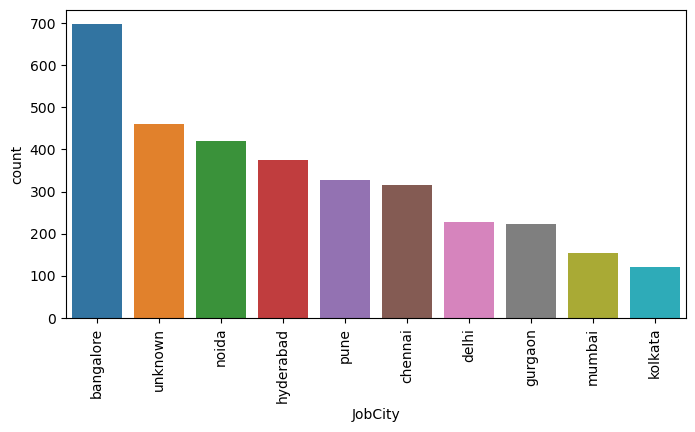

In [77]:
top_categories = df['JobCity'].value_counts().head(10)
plt.figure(figsize=(8, 4))
sns.countplot(x='JobCity', data=df,order=top_categories.index)
plt.xticks(rotation=90) 

⭐OBSERVATION OF **JobCity** COLUMN:

<div style = 'background:skyblue'>
*
    
* The highest occurring job city is `Bangalore`
* But if we observe we replaced     `null values` with `unknown` which is `second highest`
 (note: That can be replaced by the mode of the JobCity)
    
*</div>

### <span style='color:blue'>2.6 Designation</span>

#### <span style='color:brown'> Cloumn cleaning on Designation cloumn </span>

In [48]:
df['Designation'].isnull().sum()

0

In [51]:
df['Designation'].unique()

array(['senior quality engineer', 'assistant manager', 'systems engineer',
       'senior software engineer', 'get', 'system engineer',
       'java software engineer', 'mechanical engineer',
       'electrical engineer', 'project engineer', 'senior php developer',
       'senior systems engineer', 'quality assurance engineer',
       'qa analyst', 'network engineer', 'product development engineer',
       'associate software developer', 'data entry operator',
       'software engineer', 'developer', 'electrical project engineer',
       'programmer analyst', 'systems analyst', 'ase',
       'telecommunication engineer', 'application developer',
       'ios developer', 'executive assistant', 'online marketing manager',
       'documentation specialist', 'associate software engineer',
       'management trainee', 'site manager', 'software developer',
       '.net developer', 'production engineer', 'jr. software engineer',
       'trainee software developer', 'ui developer',
       'assi

- if u observe there are short forms and some roles repeated 

In [53]:
df['Designation'] = df['Designation'].replace('get',' graduate engineer trainee')
df['Designation'] = df['Designation'].replace('ase','associate software engineer')
df['Designation'] = df['Designation'].replace('asst. manager','assistant manager')
df['Designation'] = df['Designation'].replace('software engineering associate','associate software engineer')
df['Designation'] = df['Designation'].replace('associate software engg','associate software engineer')

- now cleaned Designation

#### <span style='color:brown'> Non visual analysis on Designation cloumn </span>

In [84]:
print("*"*10, "Designation", "*"*10)
print(df['Designation'].agg(['count', 'nunique', 'unique']))
print('Value Counts: \n', df['Designation'].value_counts(normalize = True)*100)
print()

********** Designation **********
count                                                   3998
nunique                                                  415
unique     [senior quality engineer, assistant manager, s...
Name: Designation, dtype: object
Value Counts: 
 software engineer                    13.481741
software developer                    6.628314
system engineer                       5.127564
programmer analyst                    3.476738
systems engineer                      2.951476
                                       ...    
cad drafter                           0.025013
noc engineer                          0.025013
human resources intern                0.025013
senior quality assurance engineer     0.025013
jr. software developer                0.025013
Name: Designation, Length: 415, dtype: float64



#### <span style='color:brown'> visual analysis on Designation cloumn </span>

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'software engineer'),
  Text(1, 0, 'software developer'),
  Text(2, 0, 'system engineer'),
  Text(3, 0, 'programmer analyst'),
  Text(4, 0, 'systems engineer'),
  Text(5, 0, 'java software engineer'),
  Text(6, 0, 'software test engineer'),
  Text(7, 0, 'project engineer'),
  Text(8, 0, 'technical support engineer'),
  Text(9, 0, 'senior software engineer')])

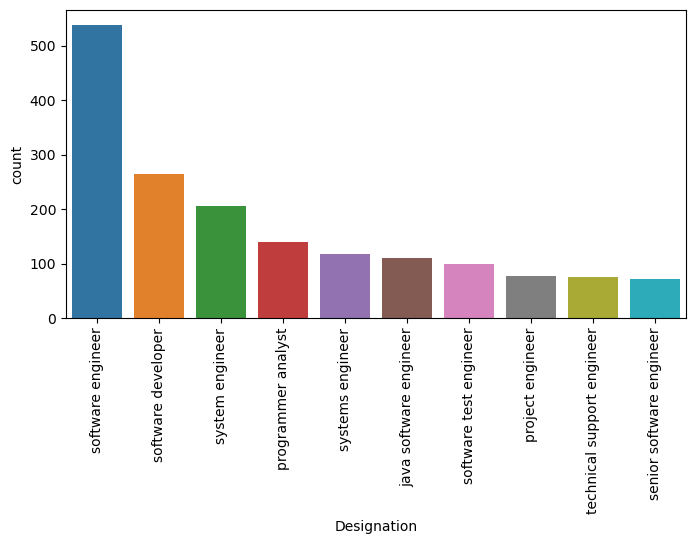

In [81]:
top_categories = df['Designation'].value_counts().head(10)
plt.figure(figsize=(8, 4))
sns.countplot(x='Designation', data=df,order=top_categories.index)
plt.xticks(rotation=90) 

⭐OBSERVATION OF **Designation** COLUMN:

<div style = 'background:skyblue'>
*
    
* Based on the observation that `Software Engineer` is the most frequently designation.
* But if we observe there are lot software domain  followed by  which can be clubed together.
    
*</div>

### <span style='color:blue'>2.7 10board</span>

#### <span style='color:brown'> Cloumn cleaning on 10board cloumn </span>

In [86]:
df['10board'].unique()

array(['board ofsecondary education,ap', 'cbse', 'state board',
       'mp board bhopal', 'icse',
       'karnataka secondary school of examination', 'up',
       'karnataka state education examination board', 'ssc',
       'kerala state technical education', 0, 'bseb',
       'state board of secondary education, andhra pradesh',
       'matriculation', 'gujarat state board', 'karnataka state board',
       'wbbse', 'maharashtra state board', 'icse board', 'up board',
       'board of secondary education(bse) orissa',
       'little jacky matric higher secondary school',
       'uttar pradesh board', 'bsc,orissa', 'mp board', 'upboard',
       'matriculation board', 'j & k bord', 'rbse',
       'central board of secondary education', 'pseb', 'jkbose',
       'haryana board of school education,(hbse)', 'metric', 'ms board',
       'kseeb', 'stateboard', 'maticulation',
       'karnataka secondory education board', 'mumbai board', 'sslc',
       'kseb', 'board secondary  education', 'mat

In [118]:
def board(x):
    if (x == 'cbse')or x == 'central board of secondary education' or x == 'cbse[gulf zone]' or x =='jawahar navodaya vidyalaya':
        return 'cbse'
    elif x == 'icse' or x== 'icse board' or x == 'icse board , new delhi':
        return 'icse'
    else:
        return 'state'

In [119]:
df['10board'] = df['10board'].apply(board)

- now you can see cleaned column

#### <span style='color:brown'> Non visual analysis on 10board cloumn </span>

In [120]:
print("*"*10, "10board", "*"*10)
print(df['10board'].agg(['count', 'nunique', 'unique']))
print('Value Counts: \n', df['10board'].value_counts(normalize = True)*100)
print()

********** 10board **********
count                     3998
nunique                      3
unique     [state, cbse, icse]
Name: 10board, dtype: object
Value Counts: 
 state    57.653827
cbse     35.267634
icse      7.078539
Name: 10board, dtype: float64



#### <span style='color:brown'> visual analysis on 10board cloumn </span>

<Axes: xlabel='10board', ylabel='count'>

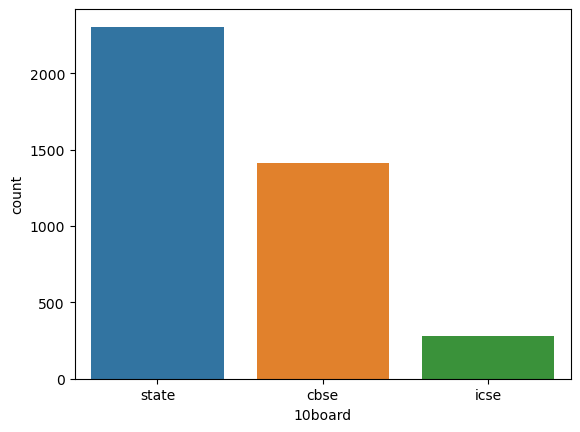

In [121]:
sns.countplot(x='10board', data=df) 

⭐OBSERVATION OF **10board** COLUMN:

<div style = 'background:skyblue'>
*
    
* The analysis reveals that the majority of candidates have completed their education in 10th under the `State Board`
    
*</div>

### <span style='color:blue'>2.8 12board</span>

#### <span style='color:brown'> Cloumn cleaning on 12board cloumn </span>

In [130]:
df['12board'].unique() 

array(['state', 'cbse', 'icse'], dtype=object)

In [124]:
df['12board'].isnull().sum()

0

In [126]:
def board(x):
    if (x == 'cbse')or x == 'all india board' or x == 'central board of secondary education, new delhi' or x =='cbese':
        return 'cbse'
    elif x == 'icse' or x== 'isc' or x == 'isc board' or x == 'cicse':
        return 'icse'
    else:
        return 'state'

In [127]:
df['12board'] = df['12board'].apply(board)

#### <span style='color:brown'> Non visual analysis on 12board cloumn </span>

In [128]:
print("*"*10, "12board", "*"*10)
print(df['12board'].agg(['count', 'nunique', 'unique']))
print('Value Counts: \n', df['12board'].value_counts(normalize = True)*100)
print()

********** 12board **********
count                     3998
nunique                      3
unique     [state, cbse, icse]
Name: 12board, dtype: object
Value Counts: 
 state    60.505253
cbse     35.092546
icse      4.402201
Name: 12board, dtype: float64



#### <span style='color:brown'> visual analysis on 12board cloumn </span>

<Axes: xlabel='12board', ylabel='count'>

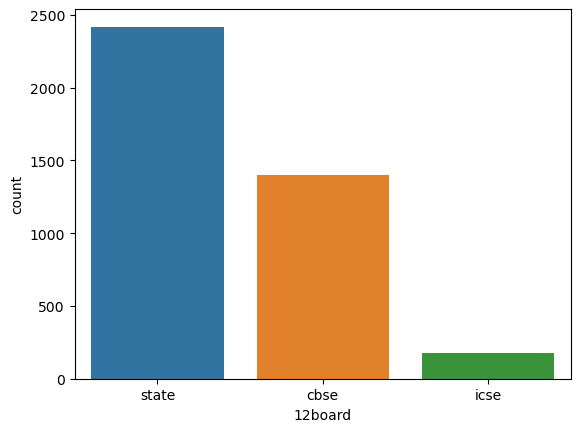

In [129]:
sns.countplot(x='12board', data=df) 

⭐OBSERVATION OF **12board** COLUMN:

<div style = 'background:skyblue'>
*
    
* The analysis reveals that the majority of candidates have completed their education in 12th under the `State Board`
    
*</div>

### <span style='color:blue'>2.9 CollegeTier</span>

#### <span style='color:brown'> Cloumn cleaning on CollegeTier cloumn </span>

In [131]:
df['CollegeTier'].unique()

array([2, 1], dtype=object)

#### <span style='color:brown'> Non visual analysis on College Tier cloumn </span>

In [132]:
print("*"*10, "CollegeTier", "*"*10)
print(df['CollegeTier'].agg(['count', 'nunique', 'unique']))
print('Value Counts: \n', df['CollegeTier'].value_counts(normalize = True)*100)
print()

********** CollegeTier **********
count        3998
nunique         2
unique     [2, 1]
Name: CollegeTier, dtype: object
Value Counts: 
 2    92.571286
1     7.428714
Name: CollegeTier, dtype: float64



#### <span style='color:brown'> visual analysis on CollegeTier cloumn </span>

<Axes: xlabel='CollegeTier', ylabel='count'>

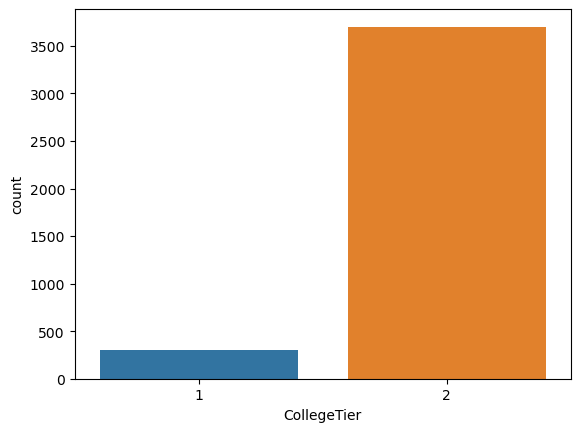

In [133]:
sns.countplot(x='CollegeTier', data=df) 

⭐OBSERVATION OF **CollegeTier** COLUMN:

<div style = 'background:skyblue'>
*
    
* Maximum students who took exam are from `tier-2` college
    
*</div>

### <span style='color:blue'>2.10 Degree</span>

#### <span style='color:brown'> Cloumn cleaning on Degree cloumn </span>

In [136]:
df['Degree'].unique()

array(['B.Tech/B.E.', 'MCA', 'M.Tech./M.E.', 'M.Sc. (Tech.)'],
      dtype=object)

#### <span style='color:brown'> Non visual analysis on Degree cloumn </span>

In [143]:
print("*"*10, "Degree", "*"*10)
print(df['Degree'].agg(['count', 'nunique', 'unique']))
print('Value Counts: \n', df['Degree'].value_counts(normalize = True)*100)
print()

********** Degree **********
count                                                 3998
nunique                                                  4
unique     [B.Tech/B.E., MCA, M.Tech./M.E., M.Sc. (Tech.)]
Name: Degree, dtype: object
Value Counts: 
 B.Tech/B.E.      92.546273
MCA               6.078039
M.Tech./M.E.      1.325663
M.Sc. (Tech.)     0.050025
Name: Degree, dtype: float64



#### <span style='color:brown'> visual analysis on Degree cloumn </span>

<Axes: xlabel='Degree', ylabel='count'>

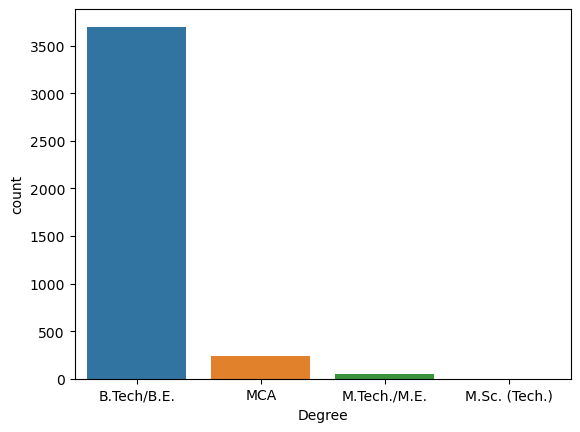

In [144]:
sns.countplot(x='Degree', data=df) 

⭐OBSERVATION OF **Degree** COLUMN:

<div style = 'background:skyblue'>
*
    
* he analysis indicates that the largest proportion of candidates who took the exam are from the `(B.Tech/B.E)` background. 

*</div>

### <span style='color:blue'>2.11 Specialization</span>

#### <span style='color:brown'> Cloumn cleaning on Specialization cloumn </span>

In [137]:
df['Specialization'].unique()

array(['computer engineering',
       'electronics and communication engineering',
       'information technology', 'computer science & engineering',
       'mechanical engineering', 'electronics and electrical engineering',
       'electronics & telecommunications',
       'instrumentation and control engineering', 'computer application',
       'electronics and computer engineering', 'electrical engineering',
       'applied electronics and instrumentation',
       'electronics & instrumentation eng',
       'information science engineering', 'civil engineering',
       'mechanical and automation', 'industrial & production engineering',
       'control and instrumentation engineering',
       'metallurgical engineering',
       'electronics and instrumentation engineering',
       'electronics engineering', 'ceramic engineering',
       'chemical engineering', 'aeronautical engineering', 'other',
       'biotechnology', 'embedded systems technology',
       'electrical and power engi

In [188]:
def specialization(x):
    if ('computer' in x) or ('technology' in x) or ('information science' in x):
        return 'computer_science'
    elif ('electronics' in x) or ('electrical' in x) or ('embedded' in x) or ('power system' in x):
        return 'electronics'
    elif 'civil' in x:
        return 'civil'
    elif ('mechanical' in x) or ('automation' in x) or ('mechatronics' in x) or ('aeronautical' in x) or ('combustion' in x):
        return 'mechanical'
    else:
        return 'other'

In [189]:
df['Specialization'] = df['Specialization'].apply(lambda x: specialization(str(x)))

#### <span style='color:brown'> Non visual analysis on Specialization cloumn </span>

In [190]:
print("*"*10, "Specialization", "*"*10)
print(df['Specialization'].agg(['count', 'nunique', 'unique']))
print('Value Counts: \n', df['Specialization'].value_counts(normalize = True)*100)
print()

********** Specialization **********
count                                                   3998
nunique                                                    5
unique     [computer_science, electronics, mechanical, ot...
Name: Specialization, dtype: object
Value Counts: 
 computer_science    57.728864
electronics         34.267134
mechanical           5.377689
other                1.900950
civil                0.725363
Name: Specialization, dtype: float64



#### <span style='color:brown'> visual analysis on Specialization cloumn </span>

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'computer_science'),
  Text(1, 0, 'electronics'),
  Text(2, 0, 'mechanical'),
  Text(3, 0, 'other'),
  Text(4, 0, 'civil')])

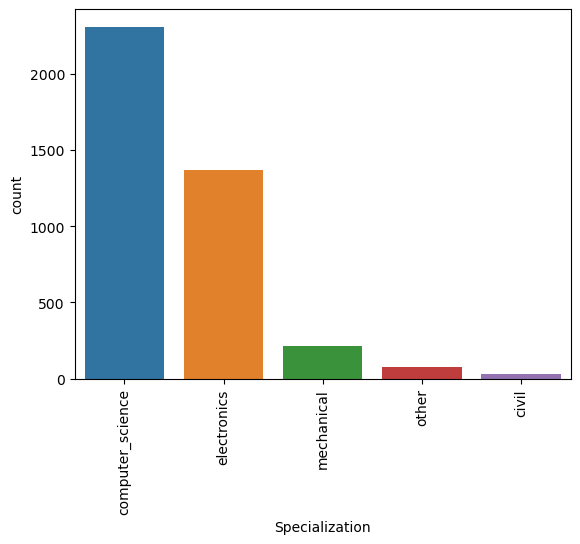

In [238]:
sns.countplot(x='Specialization', data=df)
plt.xticks(rotation=90) 

⭐OBSERVATION OF **Specialization** COLUMN:

<div style = 'background:skyblue'>
*
    
* The analysis reveals that the highest number of candidates who took the exam belong to the `Computer Science` specialization
    
*</div>

### <span style='color:blue'>2.12 collegeGPA</span>

#### <span style='color:brown'> Cloumn cleaning on collegeGPA cloumn </span>

In [138]:
df['collegeGPA'].describe()

count    3998.000000
mean       71.486171
std         8.167338
min         6.450000
25%        66.407500
50%        71.720000
75%        76.327500
max        99.930000
Name: collegeGPA, dtype: float64

- if you observe minimum is 6.450000 may be there is cgpa which not convert in percentage

In [147]:
df.loc[df['collegeGPA']<=10,'collegeGPA'] = (df.loc[df['collegeGPA']<=10,'collegeGPA']/10)*100

In [148]:
df['collegeGPA'].describe()

count    3998.000000
mean       71.695728
std         7.406631
min        49.070000
25%        66.505000
50%        71.800000
75%        76.400000
max        99.930000
Name: collegeGPA, dtype: float64

#### <span style='color:brown'> Non visual analysis on collegeGPA cloumn </span>

In [149]:
print("*"*10, "collegeGPA" , "*"*10)
print(df['collegeGPA'].agg(['count','min', 'max', 'mean', 'median', 'std','skew','kurt']))
print()

********** collegeGPA **********
count     3998.000000
min         49.070000
max         99.930000
mean        71.695728
median      71.800000
std          7.406631
skew         0.169940
kurt         0.080064
Name: collegeGPA, dtype: float64



#### <span style='color:brown'> visual analysis on collegeGPA cloumn </span>

Text(49.07, 0.2, 'min = 49.07 😢')

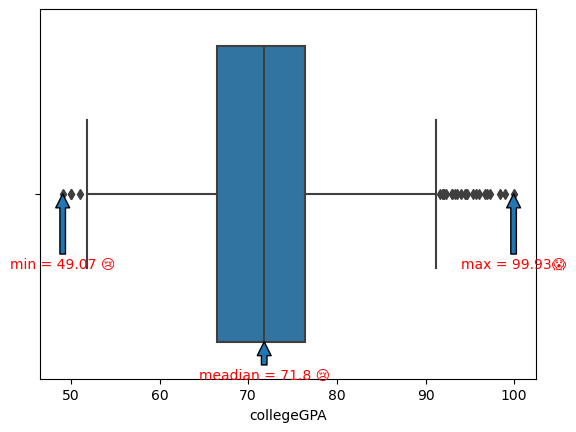

In [152]:
sns.boxplot(x = 'collegeGPA',data = df)

# Annotate max with arrow
plt.annotate("max = 99.93😱",
             xy=(df['collegeGPA'].max(), 0), 
             xytext=(df['collegeGPA'].max(),0.2),
             arrowprops={"width":4,"headwidth":10,'headlength':10},
             color='Red',
             fontsize=10, ha='center')


# Annotate medain with arrow
plt.annotate("meadian = 71.8 😢",
             xy=(df['collegeGPA'].median(), 0.4), 
             xytext=(df['collegeGPA'].median(),0.5),
             arrowprops={"width":4,"headwidth":10,'headlength':10},
             color='Red',
             fontsize=10, ha='center')

# Annotate mean with arrow
plt.annotate("min = 49.07 😢",
             xy=(df['collegeGPA'].min(), 0), 
             xytext=(df['collegeGPA'].min(),0.2),
             arrowprops={"width":4,"headwidth":10,'headlength':10},
             color='Red',
             fontsize=10, ha='center')

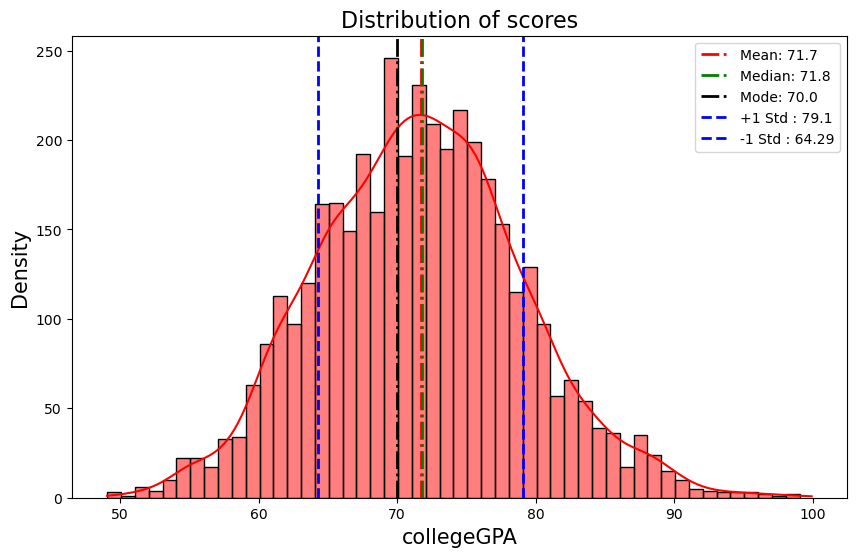

In [153]:
plt.figure(figsize=(10, 6))

sns.histplot(df['collegeGPA'], bins=np.arange(df['collegeGPA'].min(), df['collegeGPA'].max()), kde=True,color = 'red' )

# Plot vertical lines for mean, median, and mode
plt.axvline(df['collegeGPA'].mean(), color='red', linestyle='-.', linewidth=2, label=f"Mean: {round(df['collegeGPA'].mean(), 2)}")
plt.axvline(df['collegeGPA'].median(), color='green', linestyle='-.', linewidth=2, label=f"Median: {round(df['collegeGPA'].median(), 2)}")
plt.axvline(df['collegeGPA'].mode()[0], color='black', linestyle='-.', linewidth=2, label=f"Mode: {round(df['collegeGPA'].mode()[0], 2)}")

std = df['collegeGPA'].std()
plt.axvline(df['collegeGPA'].mean() + std, color='blue', linestyle='--', linewidth=2, label=f"+1 Std : {round(df['collegeGPA'].mean() + std, 2)}")
plt.axvline(df['collegeGPA'].mean() - std, color='blue', linestyle='--', linewidth=2, label=f"-1 Std : {round(df['collegeGPA'].mean() - std, 2)}")

# Set labels and title
plt.xlabel('collegeGPA', size=15)
plt.ylabel('Density', size=15)
plt.title('Distribution of scores', size=16)

# Show legend
plt.legend()

# Show plot
plt.show()

⭐OBSERVATION OF **10percentage** COLUMN:

<div style = 'background:skyblue'>
*
    
* The distribution of collegeGPA in the dataset appears to be `relatively symmetrical` with a moderate spread around the mean, indicating a diverse range of GPA values among the individuals
    
*</div>

### <span style='color:blue'>2.13 12graduation</span>

#### <span style='color:brown'> Cloumn cleaning on 12graduation cloumn </span>

In [156]:
df['12graduation'].unique()

array([2007, 2010, 2008, 2009, 2006, 2011, 2005, 1995, 2004, 2012, 2003,
       2002, 2001, 1998, 2013, 1999], dtype=int64)

#### <span style='color:brown'> Non visual analysis on 12graduation cloumn </span>

In [155]:
print("*"*10, "12graduation", "*"*10)
print(df['12graduation'].agg(['count', 'nunique', 'unique']))
print('Value Counts: \n', df['12graduation'].value_counts(normalize = True)*100)
print()

********** 12graduation **********
count                                                   3998
nunique                                                   16
unique     [2007, 2010, 2008, 2009, 2006, 2011, 2005, 199...
Name: 12graduation, dtype: object
Value Counts: 
 2009    26.313157
2008    23.386693
2010    18.559280
2007    13.206603
2006    10.180090
2005     4.002001
2004     1.825913
2011     1.150575
2003     0.625313
2002     0.350175
2012     0.250125
2001     0.050025
1995     0.025013
1998     0.025013
2013     0.025013
1999     0.025013
Name: 12graduation, dtype: float64



#### <span style='color:brown'> visual analysis on 12graduation cloumn </span>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, '1995'),
  Text(1, 0, '1998'),
  Text(2, 0, '1999'),
  Text(3, 0, '2001'),
  Text(4, 0, '2002'),
  Text(5, 0, '2003'),
  Text(6, 0, '2004'),
  Text(7, 0, '2005'),
  Text(8, 0, '2006'),
  Text(9, 0, '2007'),
  Text(10, 0, '2008'),
  Text(11, 0, '2009'),
  Text(12, 0, '2010'),
  Text(13, 0, '2011'),
  Text(14, 0, '2012'),
  Text(15, 0, '2013')])

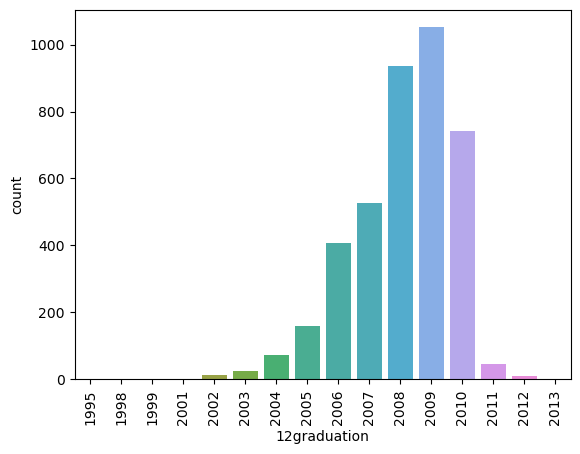

In [158]:
sns.countplot(x='12graduation', data=df) 
plt.xticks(rotation=90) 

⭐OBSERVATION OF **10percentage** COLUMN:

<div style = 'background:skyblue'>
*
    
* The analysis reveals that the highest number of candidates 12graduation is from `2009&2008` 
    
*</div>

### <span style='color:blue'>2.14 CollegeCityTier</span>

#### <span style='color:brown'> Cloumn cleaning on CollegeCityTier cloumn </span>

In [140]:
df['CollegeCityTier'].unique()

array([0, 1], dtype=object)

#### <span style='color:brown'> Non visual analysis on CollegeCityTier cloumn </span>

In [159]:
print("*"*10, "CollegeCityTier", "*"*10)
print(df['CollegeCityTier'].agg(['count', 'nunique', 'unique']))
print('Value Counts: \n', df['CollegeCityTier'].value_counts(normalize = True)*100)
print()

********** CollegeCityTier **********
count        3998
nunique         2
unique     [0, 1]
Name: CollegeCityTier, dtype: object
Value Counts: 
 0    69.95998
1    30.04002
Name: CollegeCityTier, dtype: float64



#### <span style='color:brown'> visual analysis on CollegeCityTier cloumn </span>

<Axes: xlabel='CollegeCityTier', ylabel='count'>

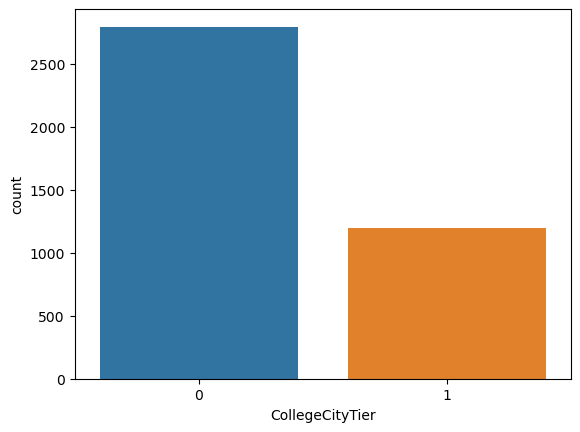

In [160]:
sns.countplot(x='CollegeCityTier', data=df) 

⭐OBSERVATION OF **CollegeCityTier** COLUMN:

<div style = 'background:skyblue'>
*
    
* The analysis reveals that the highest number of candidates who took the exam belong to the `tier-1 CollegeCity`
    
*</div>

### <span style='color:blue'>2.15 CollegeState</span>

#### <span style='color:brown'> Cloumn cleaning on CollegeState cloumn </span>

In [141]:
df['CollegeState'].unique()

array(['Andhra Pradesh', 'Madhya Pradesh', 'Uttar Pradesh', 'Delhi',
       'Karnataka', 'Tamil Nadu', 'West Bengal', 'Maharashtra', 'Haryana',
       'Telangana', 'Orissa', 'Punjab', 'Kerala', 'Gujarat', 'Rajasthan',
       'Chhattisgarh', 'Uttarakhand', 'Jammu and Kashmir', 'Jharkhand',
       'Himachal Pradesh', 'Bihar', 'Assam', 'Goa', 'Sikkim',
       'Union Territory', 'Meghalaya'], dtype=object)

#### <span style='color:brown'> Non visual analysis on CollegeState cloumn </span>

In [161]:
print("*"*10, "CollegeState", "*"*10)
print(df['CollegeState'].agg(['count', 'nunique', 'unique']))
print('Value Counts: \n', df['CollegeState'].value_counts(normalize = True)*100)
print()

********** CollegeState **********
count                                                   3998
nunique                                                   26
unique     [Andhra Pradesh, Madhya Pradesh, Uttar Pradesh...
Name: CollegeState, dtype: object
Value Counts: 
 Uttar Pradesh        22.886443
Karnataka             9.254627
Tamil Nadu            9.179590
Telangana             7.978989
Maharashtra           6.553277
Andhra Pradesh        5.627814
West Bengal           4.902451
Punjab                4.827414
Madhya Pradesh        4.727364
Haryana               4.502251
Rajasthan             4.352176
Orissa                4.302151
Delhi                 4.052026
Uttarakhand           2.826413
Kerala                0.825413
Jharkhand             0.700350
Chhattisgarh          0.675338
Gujarat               0.600300
Himachal Pradesh      0.400200
Bihar                 0.250125
Jammu and Kashmir     0.175088
Assam                 0.125063
Union Territory       0.125063
Sikkim             

#### <span style='color:brown'> visual analysis on CollegeState cloumn </span>

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Uttar Pradesh'),
  Text(1, 0, 'Karnataka'),
  Text(2, 0, 'Tamil Nadu'),
  Text(3, 0, 'Telangana'),
  Text(4, 0, 'Maharashtra'),
  Text(5, 0, 'Andhra Pradesh'),
  Text(6, 0, 'West Bengal'),
  Text(7, 0, 'Punjab'),
  Text(8, 0, 'Madhya Pradesh'),
  Text(9, 0, 'Haryana')])

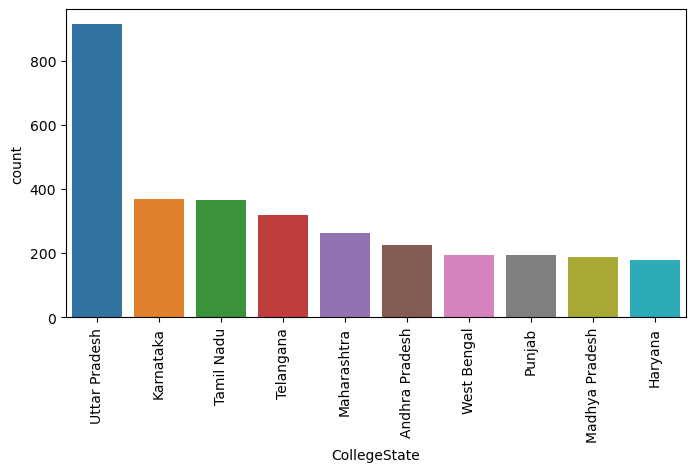

In [162]:
top_categories = df['CollegeState'].value_counts().head(10)
plt.figure(figsize=(8, 4))
sns.countplot(x='CollegeState', data=df,order=top_categories.index)
plt.xticks(rotation=90)

⭐OBSERVATION OF **CollegeState** COLUMN:

<div style = 'background:skyblue'>
*
    
* The analysis reveals that the highest number of candidates who took the exam belong to the College state is `UttarPradesh`
    
*</div>

### <span style='color:blue'>2.16 GraduationYear</span>

#### <span style='color:brown'> Cloumn cleaning on GraduationYear cloumn </span>

In [142]:
df['GraduationYear'].unique()

array([2011, 2012, 2014, 2016, 2013, 2010, 2015, 2009, 2017,    0, 2007],
      dtype=int64)

In [165]:
df['GraduationYear'] = df['GraduationYear'].replace(0, np.nan)

In [166]:
df['GraduationYear'].fillna(df['GraduationYear'].mode()[0], inplace = True)

In [169]:
df['GraduationYear'] = df['GraduationYear'].astype('int64')

#### <span style='color:brown'> Non visual analysis on GraduationYear cloumn </span>

In [170]:
print("*"*10, "GraduationYear", "*"*10)
print(df['GraduationYear'].agg(['count', 'nunique', 'unique']))
print('Value Counts: \n', df['GraduationYear'].value_counts(normalize = True)*100)
print()

********** GraduationYear **********
count                                                   3998
nunique                                                   10
unique     [2011, 2012, 2014, 2016, 2013, 2010, 2015, 200...
Name: GraduationYear, dtype: object
Value Counts: 
 2013    29.564782
2014    25.912956
2012    21.185593
2011    12.681341
2010     7.303652
2015     2.351176
2009     0.600300
2017     0.200100
2016     0.175088
2007     0.025013
Name: GraduationYear, dtype: float64



#### <span style='color:brown'> visual analysis on GraduationYear cloumn </span>

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '2007'),
  Text(1, 0, '2009'),
  Text(2, 0, '2010'),
  Text(3, 0, '2011'),
  Text(4, 0, '2012'),
  Text(5, 0, '2013'),
  Text(6, 0, '2014'),
  Text(7, 0, '2015'),
  Text(8, 0, '2016'),
  Text(9, 0, '2017')])

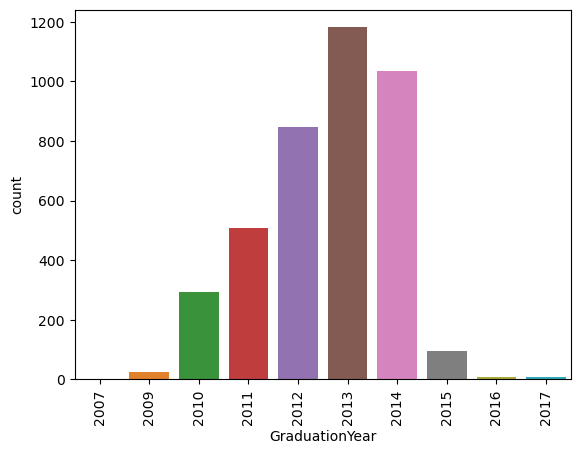

In [171]:
sns.countplot(x='GraduationYear', data=df) 
plt.xticks(rotation=90) 

⭐OBSERVATION OF **GraduationYear** COLUMN:

<div style = 'background:skyblue'>
*
    
* The analysis reveals that the highest number of candidates GraduationYear from `2013`
    
*</div>

### <span style='color:blue'>2.17 English</span>

#### <span style='color:brown'> Cloumn cleaning on English cloumn </span>

In [173]:
df['English'].describe()

count    3998.000000
mean      501.649075
std       104.940021
min       180.000000
25%       425.000000
50%       500.000000
75%       570.000000
max       875.000000
Name: English, dtype: float64

#### <span style='color:brown'> Non visual analysis on English cloumn </span>

In [178]:
print("*"*10, "English" , "*"*10)
print(df['English'].agg(['count','min', 'max', 'mean', 'median', 'std','skew','kurt']))
print()

********** English **********
count     3998.000000
min        180.000000
max        875.000000
mean       501.649075
median     500.000000
std        104.940021
skew         0.191997
kurt        -0.254133
Name: English, dtype: float64



#### <span style='color:brown'> visual analysis on English cloumn </span>

Text(180, 0.2, 'min = 180.0 😢')

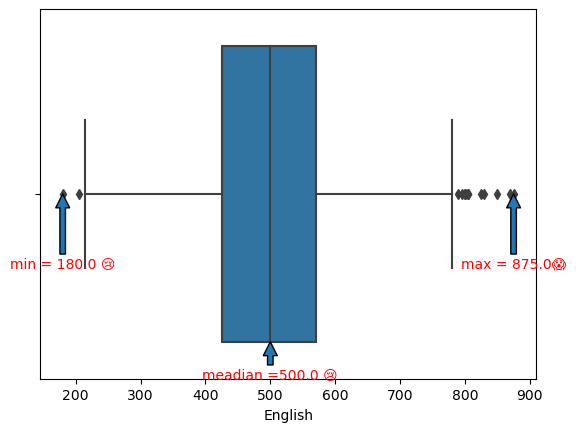

In [180]:
sns.boxplot(x = 'English',data = df)

# Annotate max with arrow
plt.annotate("max = 875.0😱",
             xy=(df['English'].max(), 0), 
             xytext=(df['English'].max(),0.2),
             arrowprops={"width":4,"headwidth":10,'headlength':10},
             color='Red',
             fontsize=10, ha='center')


# Annotate medain with arrow
plt.annotate("meadian =500.0 😢",
             xy=(df['English'].median(), 0.4), 
             xytext=(df['English'].median(),0.5),
             arrowprops={"width":4,"headwidth":10,'headlength':10},
             color='Red',
             fontsize=10, ha='center')

# Annotate mean with arrow
plt.annotate("min = 180.0 😢",
             xy=(df['English'].min(), 0), 
             xytext=(df['English'].min(),0.2),
             arrowprops={"width":4,"headwidth":10,'headlength':10},
             color='Red',
             fontsize=10, ha='center')

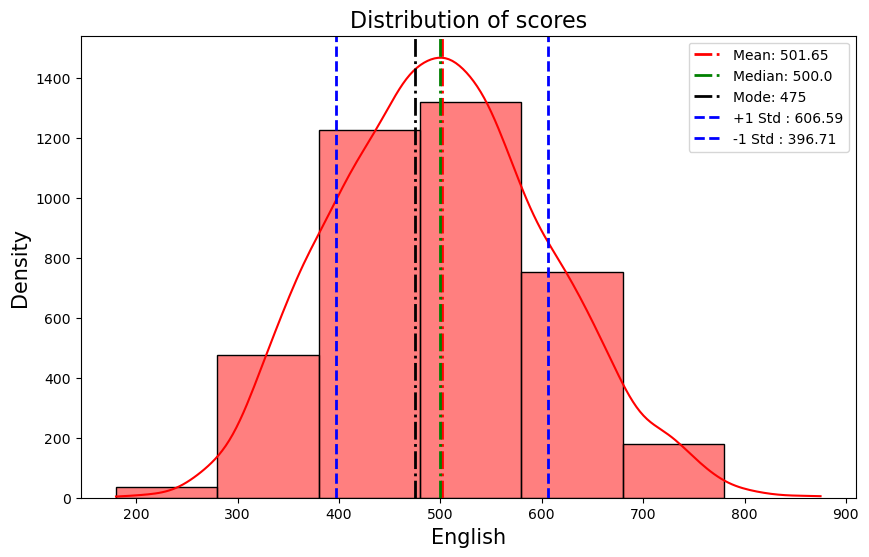

In [183]:
plt.figure(figsize=(10, 6))

sns.histplot(df['English'], bins=np.arange(df['English'].min(), df['English'].max(),100), kde=True,color = 'red' )

# Plot vertical lines for mean, median, and mode
plt.axvline(df['English'].mean(), color='red', linestyle='-.', linewidth=2, label=f"Mean: {round(df['English'].mean(), 2)}")
plt.axvline(df['English'].median(), color='green', linestyle='-.', linewidth=2, label=f"Median: {round(df['English'].median(), 2)}")
plt.axvline(df['English'].mode()[0], color='black', linestyle='-.', linewidth=2, label=f"Mode: {round(df['English'].mode()[0], 2)}")

std = df['English'].std()
plt.axvline(df['English'].mean() + std, color='blue', linestyle='--', linewidth=2, label=f"+1 Std : {round(df['English'].mean() + std, 2)}")
plt.axvline(df['English'].mean() - std, color='blue', linestyle='--', linewidth=2, label=f"-1 Std : {round(df['English'].mean() - std, 2)}")

# Set labels and title
plt.xlabel('English', size=15)
plt.ylabel('Density', size=15)
plt.title('Distribution of scores', size=16)

# Show legend
plt.legend()

# Show plot
plt.show()

⭐OBSERVATION OF **English** COLUMN:

<div style = 'background:skyblue'>
*
    
* The distribution of English scores is approximately normal, as evidenced by the similarity between the mean and median.
    
*</div>

### <span style='color:blue'>2.18 Logical</span>

#### <span style='color:brown'> Cloumn cleaning on Logical cloumn </span>

In [174]:
df['Logical'].describe()

count    3998.000000
mean      501.598799
std        86.783297
min       195.000000
25%       445.000000
50%       505.000000
75%       565.000000
max       795.000000
Name: Logical, dtype: float64

#### <span style='color:brown'> Non visual analysis on Logical cloumn </span>

In [194]:
print("*"*10, "Logical" , "*"*10)
print(df['Logical'].agg(['count','min', 'max', 'mean', 'median', 'std','skew','kurt']))
print()

********** Logical **********
count     3998.000000
min        195.000000
max        795.000000
mean       501.598799
median     505.000000
std         86.783297
skew        -0.216602
kurt        -0.224761
Name: Logical, dtype: float64



#### <span style='color:brown'> visual analysis on Logical cloumn </span>

Text(195, 0.2, 'min = 195.0 😢')

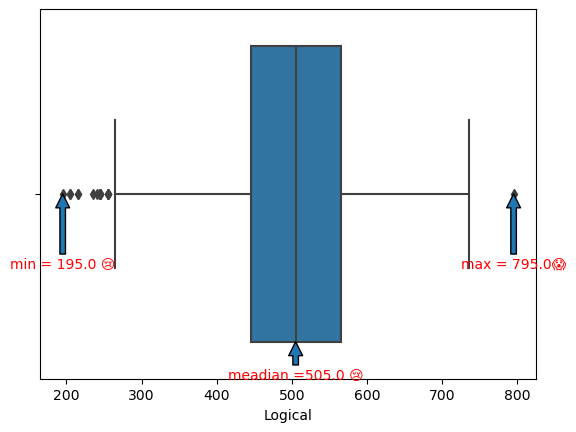

In [195]:
sns.boxplot(x = 'Logical',data = df)

# Annotate max with arrow
plt.annotate("max = 795.0😱",
             xy=(df['Logical'].max(), 0), 
             xytext=(df['Logical'].max(),0.2),
             arrowprops={"width":4,"headwidth":10,'headlength':10},
             color='Red',
             fontsize=10, ha='center')


# Annotate medain with arrow
plt.annotate("meadian =505.0 😢",
             xy=(df['Logical'].median(), 0.4), 
             xytext=(df['Logical'].median(),0.5),
             arrowprops={"width":4,"headwidth":10,'headlength':10},
             color='Red',
             fontsize=10, ha='center')

# Annotate mean with arrow
plt.annotate("min = 195.0 😢",
             xy=(df['Logical'].min(), 0), 
             xytext=(df['Logical'].min(),0.2),
             arrowprops={"width":4,"headwidth":10,'headlength':10},
             color='Red',
             fontsize=10, ha='center')

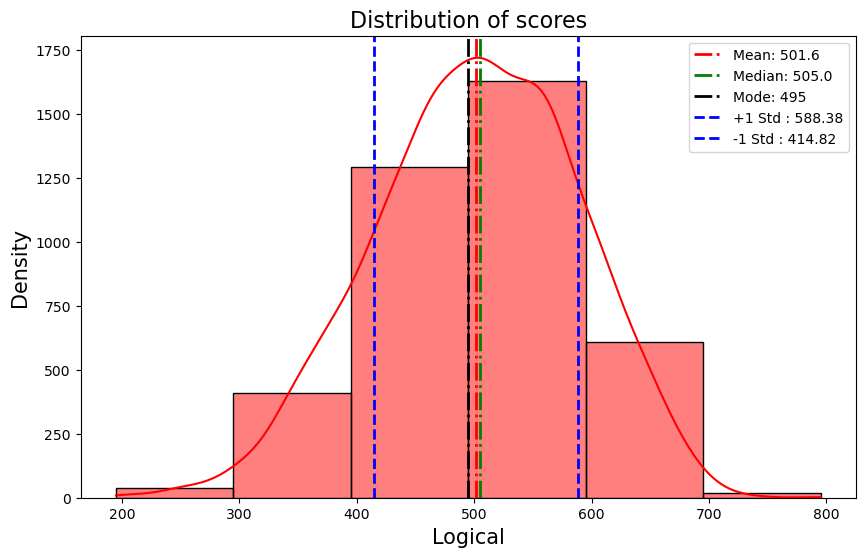

In [422]:
plt.figure(figsize=(10, 6))

sns.histplot(df['Logical'], bins=np.arange(df['Logical'].min(), df['English'].max(),100), kde=True,color = 'red' )

# Plot vertical lines for mean, median, and mode
plt.axvline(df['Logical'].mean(), color='red', linestyle='-.', linewidth=2, label=f"Mean: {round(df['Logical'].mean(), 2)}")
plt.axvline(df['Logical'].median(), color='green', linestyle='-.', linewidth=2, label=f"Median: {round(df['Logical'].median(), 2)}")
plt.axvline(df['Logical'].mode()[0], color='black', linestyle='-.', linewidth=2, label=f"Mode: {round(df['Logical'].mode()[0], 2)}")

std = df['Logical'].std()
plt.axvline(df['Logical'].mean() + std, color='blue', linestyle='--', linewidth=2, label=f"+1 Std : {round(df['Logical'].mean() + std, 2)}")
plt.axvline(df['Logical'].mean() - std, color='blue', linestyle='--', linewidth=2, label=f"-1 Std : {round(df['Logical'].mean() - std, 2)}")

# Set labels and title
plt.xlabel('Logical', size=15)
plt.ylabel('Density', size=15)
plt.title('Distribution of scores', size=16)

# Show legend
plt.legend()

# Show plot
plt.show()

⭐OBSERVATION OF **Logical** COLUMN:

<div style = 'background:skyblue'>
*
    
* The negative skewness (-0.216602) suggests a slight left skew in the distribution, meaning that there may be a slightly higher concentration of scores on the right side of the distribution.
    
*</div>

### <span style='color:blue'>2.19 Quant</span>

#### <span style='color:brown'> Cloumn cleaning on Quant cloumn </span>

In [175]:
df['Quant'].describe()

count    3998.000000
mean      513.378189
std       122.302332
min       120.000000
25%       430.000000
50%       515.000000
75%       595.000000
max       900.000000
Name: Quant, dtype: float64

#### <span style='color:brown'> Non visual analysis on Quant cloumn </span>

In [197]:
print("*"*10, "Quant" , "*"*10)
print(df['Quant'].agg(['count','min', 'max', 'mean', 'median', 'std','skew','kurt']))
print()

********** Quant **********
count     3998.000000
min        120.000000
max        900.000000
mean       513.378189
median     515.000000
std        122.302332
skew        -0.019399
kurt        -0.102472
Name: Quant, dtype: float64



#### <span style='color:brown'> visual analysis on Quant cloumn </span>

Text(120, 0.2, 'min = 120.0 😢')

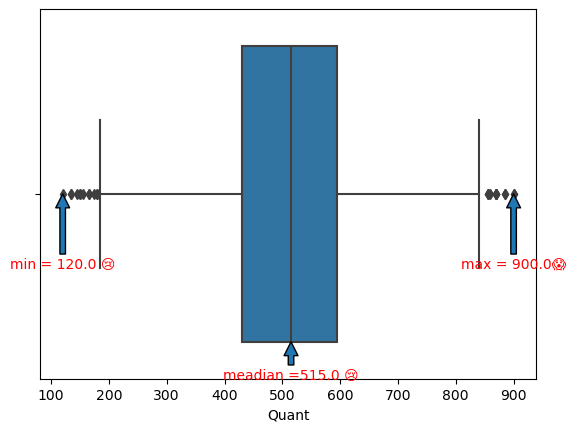

In [198]:
sns.boxplot(x = 'Quant',data = df)

# Annotate max with arrow
plt.annotate("max = 900.0😱",
             xy=(df['Quant'].max(), 0), 
             xytext=(df['Quant'].max(),0.2),
             arrowprops={"width":4,"headwidth":10,'headlength':10},
             color='Red',
             fontsize=10, ha='center')


# Annotate medain with arrow
plt.annotate("meadian =515.0 😢",
             xy=(df['Quant'].median(), 0.4), 
             xytext=(df['Quant'].median(),0.5),
             arrowprops={"width":4,"headwidth":10,'headlength':10},
             color='Red',
             fontsize=10, ha='center')

# Annotate mean with arrow
plt.annotate("min = 120.0 😢",
             xy=(df['Quant'].min(), 0), 
             xytext=(df['Quant'].min(),0.2),
             arrowprops={"width":4,"headwidth":10,'headlength':10},
             color='Red',
             fontsize=10, ha='center')

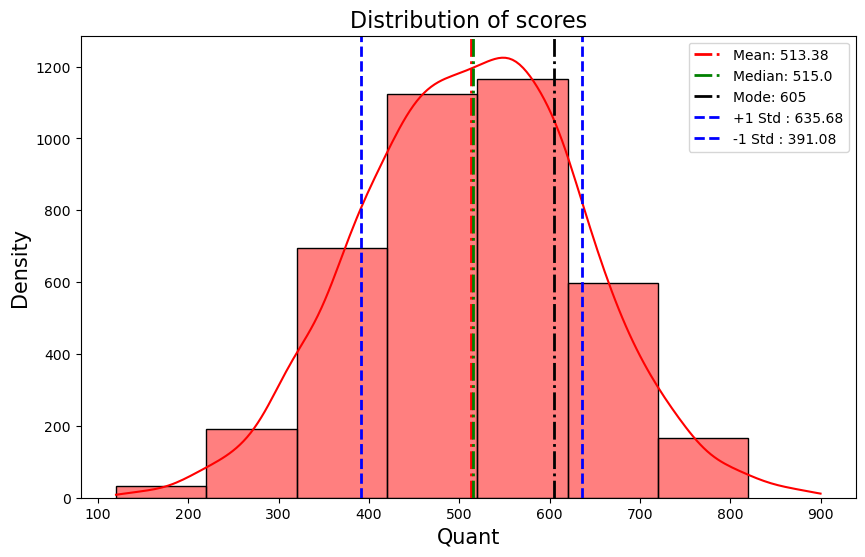

In [220]:
plt.figure(figsize=(10, 6))

sns.histplot(df['Quant'], bins=np.arange(df['Quant'].min(), df['Quant'].max(),100), kde=True,color = 'red' )

# Plot vertical lines for mean, median, and mode
plt.axvline(df['Quant'].mean(), color='red', linestyle='-.', linewidth=2, label=f"Mean: {round(df['Quant'].mean(), 2)}")
plt.axvline(df['Quant'].median(), color='green', linestyle='-.', linewidth=2, label=f"Median: {round(df['Quant'].median(), 2)}")
plt.axvline(df['Quant'].mode()[0], color='black', linestyle='-.', linewidth=2, label=f"Mode: {round(df['Quant'].mode()[0], 2)}")

std = df['Quant'].std()
plt.axvline(df['Quant'].mean() + std, color='blue', linestyle='--', linewidth=2, label=f"+1 Std : {round(df['Quant'].mean() + std, 2)}")
plt.axvline(df['Quant'].mean() - std, color='blue', linestyle='--', linewidth=2, label=f"-1 Std : {round(df['Quant'].mean() - std, 2)}")

# Set labels and title
plt.xlabel('Quant', size=15)
plt.ylabel('Density', size=15)
plt.title('Distribution of scores', size=16)

# Show legend
plt.legend()

# Show plot
plt.show()

⭐OBSERVATION OF **Quant** COLUMN:

<div style = 'background:skyblue'>
*
    
* The skewness of -0.019399 indicates a slight left skew in the distribution, meaning that there may be a slightly higher concentration of scores on the right side of the distribution.
    
*</div>

### <span style='color:blue'>2.20 Domain</span>

#### <span style='color:brown'> Cloumn cleaning on Domain cloumn </span>

In [176]:
df['Domain'].describe()

count    3998.000000
mean        0.510490
std         0.468671
min        -1.000000
25%         0.342315
50%         0.622643
75%         0.842248
max         0.999910
Name: Domain, dtype: float64

#### <span style='color:brown'> Non visual analysis on Domain cloumn </span>

In [200]:
print("*"*10, "Domain" , "*"*10)
print(df['Domain'].agg(['count','min', 'max', 'mean', 'median', 'std','skew','kurt']))
print()

********** Domain **********
count     3998.000000
min         -1.000000
max          0.999910
mean         0.510490
median       0.622643
std          0.468671
skew        -1.922146
kurt         3.895951
Name: Domain, dtype: float64



#### <span style='color:brown'> visual analysis on Domain cloumn </span>

Text(-1.0, 0.2, 'min = -1.0 😢')

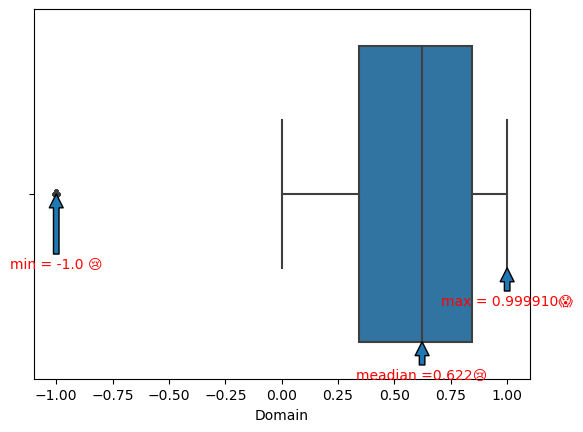

In [219]:
sns.boxplot(x = 'Domain',data = df)

# Annotate max with arrow
plt.annotate("max = 0.999910😱",
             xy=(df['Domain'].max(), 0.2), 
             xytext=(df['Domain'].max(),0.3),
             arrowprops={"width":4,"headwidth":10,'headlength':10},
             color='Red',
             fontsize=10, ha='center')


# Annotate medain with arrow
plt.annotate("meadian =0.622😢",
             xy=(df['Domain'].median(), 0.4), 
             xytext=(df['Domain'].median(),0.5),
             arrowprops={"width":4,"headwidth":10,'headlength':10},
             color='Red',
             fontsize=10, ha='center')

# Annotate mean with arrow
plt.annotate("min = -1.0 😢",
             xy=(df['Domain'].min(), 0), 
             xytext=(df['Domain'].min(),0.2),
             arrowprops={"width":4,"headwidth":10,'headlength':10},
             color='Red',
             fontsize=10, ha='center')

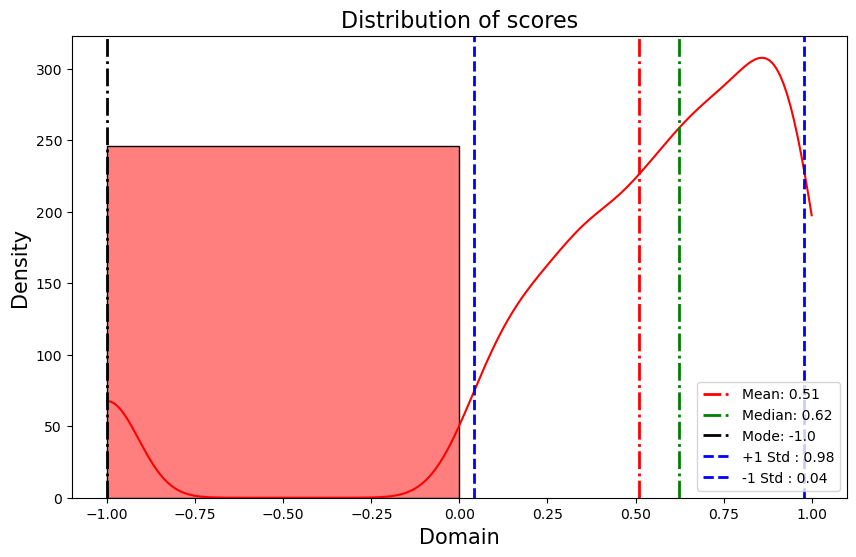

In [222]:
plt.figure(figsize=(10, 6))

sns.histplot(df['Domain'], bins=np.arange(df['Domain'].min(), df['Domain'].max()), kde=True,color = 'red' )

# Plot vertical lines for mean, median, and mode
plt.axvline(df['Domain'].mean(), color='red', linestyle='-.', linewidth=2, label=f"Mean: {round(df['Domain'].mean(), 2)}")
plt.axvline(df['Domain'].median(), color='green', linestyle='-.', linewidth=2, label=f"Median: {round(df['Domain'].median(), 2)}")
plt.axvline(df['Domain'].mode()[0], color='black', linestyle='-.', linewidth=2, label=f"Mode: {round(df['Domain'].mode()[0], 2)}")

std = df['Domain'].std()
plt.axvline(df['Domain'].mean() + std, color='blue', linestyle='--', linewidth=2, label=f"+1 Std : {round(df['Domain'].mean() + std, 2)}")
plt.axvline(df['Domain'].mean() - std, color='blue', linestyle='--', linewidth=2, label=f"-1 Std : {round(df['Domain'].mean() - std, 2)}")

# Set labels and title
plt.xlabel('Domain', size=15)
plt.ylabel('Density', size=15)
plt.title('Distribution of scores', size=16)

# Show legend
plt.legend()

# Show plot
plt.show()

In [249]:
filter_data = df[df['Domain'] != -1]['Domain']

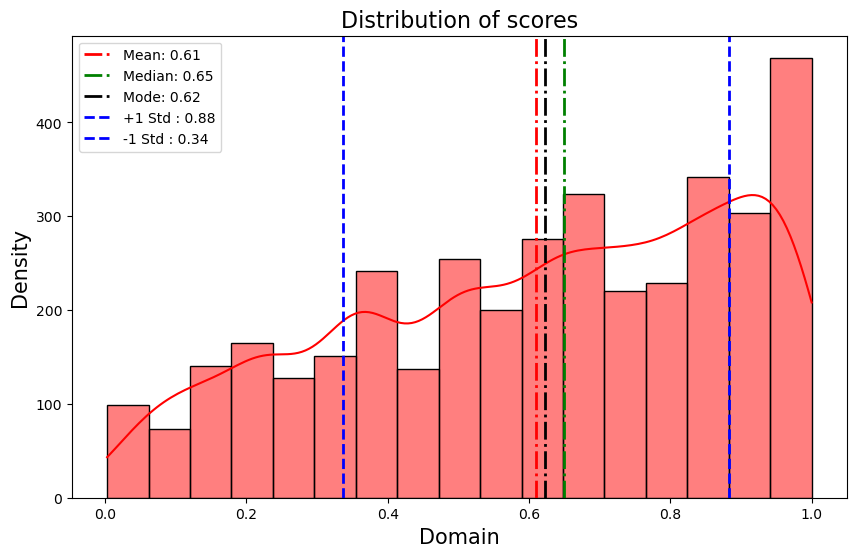

In [248]:
plt.figure(figsize=(10, 6))

sns.histplot(filter_data, bins='auto', kde=True,color = 'red' )

# Plot vertical lines for mean, median, and mode
plt.axvline(filter_data.mean(), color='red', linestyle='-.', linewidth=2, label=f"Mean: {round(filter_data.mean(), 2)}")
plt.axvline(filter_data.median(), color='green', linestyle='-.', linewidth=2, label=f"Median: {round(filter_data.median(), 2)}")
plt.axvline(filter_data.mode()[0], color='black', linestyle='-.', linewidth=2, label=f"Mode: {round(filter_data.mode()[0], 2)}")

std = filter_data.std()
plt.axvline(filter_data.mean() + std, color='blue', linestyle='--', linewidth=2, label=f"+1 Std : {round(filter_data.mean() + std, 2)}")
plt.axvline(filter_data.mean() - std, color='blue', linestyle='--', linewidth=2, label=f"-1 Std : {round(filter_data.mean() - std, 2)}")

# Set labels and title
plt.xlabel('Domain', size=15)
plt.ylabel('Density', size=15)
plt.title('Distribution of scores', size=16)

# Show legend
plt.legend()

# Show plot
plt.show()

⭐OBSERVATION OF **Domain** COLUMN:

<div style = 'background:skyblue'>
*
    
* the skewness and kurtosis values, the "Domain" column likely has a non-normal distribution, with a significant skew to the left and a greater concentration of values towards the lower end of the range.
    
*</div>

### <span style='color:blue'>2.21 ComputerProgramming</span>

#### <span style='color:brown'> Cloumn cleaning on ComputerProgramming cloumn </span>

In [263]:
df['ComputerProgramming'].describe()

count    3998.000000
mean      353.102801
std       205.355519
min        -1.000000
25%       295.000000
50%       415.000000
75%       495.000000
max       840.000000
Name: ComputerProgramming, dtype: float64

- here if we see -1 is minimum we know  -1 represent in data set is not from that domain so filter the column wihtout -1

In [264]:
filtered_data = df.loc[df['ComputerProgramming'] != -1]['ComputerProgramming']

- now cleaned ComputerProgramming

#### <span style='color:brown'> Non visual analysis on ComputerProgramming cloumn </span>

In [266]:
print("*"*10, "ComputerProgramming" , "*"*10)
print(filtered_data.agg(['count','min', 'max', 'mean', 'median', 'std','skew','kurt']))
print()

********** ComputerProgramming **********
count     3130.000000
min        105.000000
max        840.000000
mean       451.301278
median     455.000000
std         97.158687
skew        -0.015933
kurt         0.411168
Name: ComputerProgramming, dtype: float64



#### <span style='color:brown'> visual analysis on ComputerProgramming cloumn </span>

Text(105, 0.2, 'min = -1.0 😢')

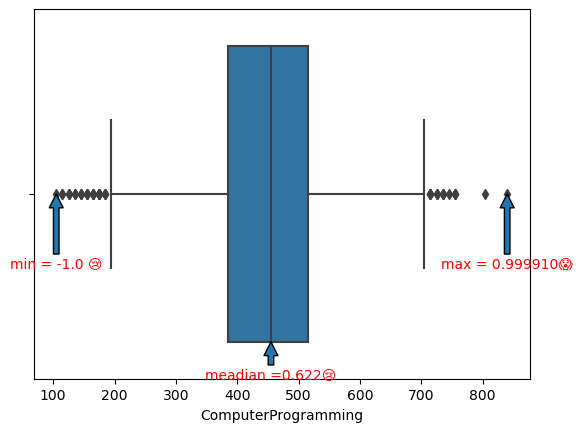

In [271]:
sns.boxplot(x =filtered_data)

# Annotate max with arrow
plt.annotate("max = 0.999910😱",
             xy=(filtered_data.max(), 0.), 
             xytext=(filtered_data.max(),0.2),
             arrowprops={"width":4,"headwidth":10,'headlength':10},
             color='Red',
             fontsize=10, ha='center')


# Annotate medain with arrow
plt.annotate("meadian =0.622😢",
             xy=(filtered_data.median(), 0.4), 
             xytext=(filtered_data.median(),0.5),
             arrowprops={"width":4,"headwidth":10,'headlength':10},
             color='Red',
             fontsize=10, ha='center')

# Annotate mean with arrow
plt.annotate("min = -1.0 😢",
             xy=(filtered_data.min(), 0), 
             xytext=(filtered_data.min(),0.2),
             arrowprops={"width":4,"headwidth":10,'headlength':10},
             color='Red',
             fontsize=10, ha='center')

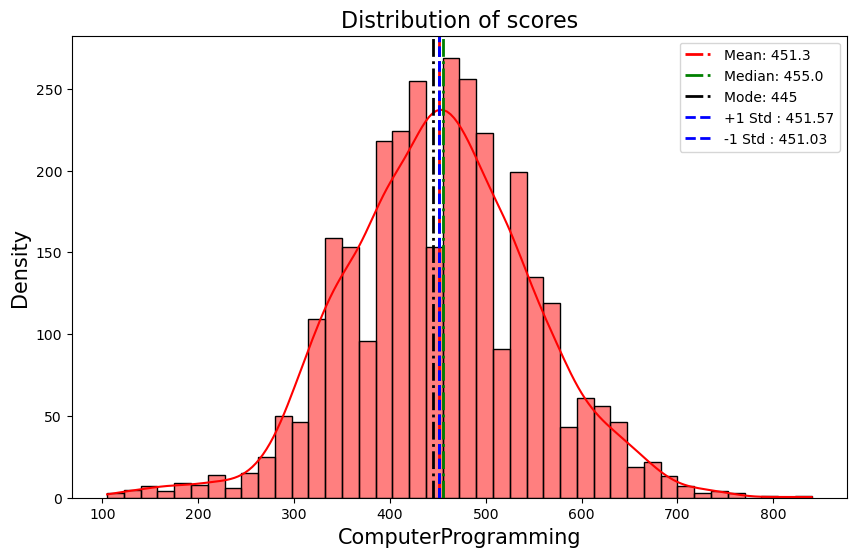

In [273]:
plt.figure(figsize=(10, 6))

sns.histplot(filtered_data, bins='auto', kde=True,color = 'red' )

# Plot vertical lines for mean, median, and mode
plt.axvline(filtered_data.mean(), color='red', linestyle='-.', linewidth=2, label=f"Mean: {round(filtered_data.mean(), 2)}")
plt.axvline(filtered_data.median(), color='green', linestyle='-.', linewidth=2, label=f"Median: {round(filtered_data.median(), 2)}")
plt.axvline(filtered_data.mode()[0], color='black', linestyle='-.', linewidth=2, label=f"Mode: {round(filtered_data.mode()[0], 2)}")

std = filter_data.std()
plt.axvline(filtered_data.mean() + std, color='blue', linestyle='--', linewidth=2, label=f"+1 Std : {round(filtered_data.mean() + std, 2)}")
plt.axvline(filtered_data.mean() - std, color='blue', linestyle='--', linewidth=2, label=f"-1 Std : {round(filtered_data.mean() - std, 2)}")

# Set labels and title
plt.xlabel('ComputerProgramming', size=15)
plt.ylabel('Density', size=15)
plt.title('Distribution of scores', size=16)

# Show legend
plt.legend()

# Show plot
plt.show()

⭐OBSERVATION OF **ComputerProgramming** COLUMN:

<div style = 'background:skyblue'>
*
    
* The skewness and kurtosis values indicate that the distribution is close to a normal distribution but may have some deviations.

*</div>

### <span style='color:blue'>2.22 ElectronicsAndSemicon</span>

#### <span style='color:brown'> Cloumn cleaning on ElectronicsAndSemicon cloumn </span>

In [361]:
df['ElectronicsAndSemicon'].describe()

count    3998.000000
mean       95.328414
std       158.241218
min        -1.000000
25%        -1.000000
50%        -1.000000
75%       233.000000
max       612.000000
Name: ElectronicsAndSemicon, dtype: float64

In [355]:
filtered_data = df.loc[df['ElectronicsAndSemicon'] != -1]['ElectronicsAndSemicon']

#### <span style='color:brown'> Non visual analysis on ElectronicsAndSemicon cloumn </span>

In [356]:
print("*"*10, "ElectronicsAndSemicon" , "*"*10)
print(filtered_data.agg(['count','min', 'max', 'mean', 'median', 'std','skew','kurt']))
print()

********** ElectronicsAndSemicon **********
count     1144.000000
min        133.000000
max        612.000000
mean       335.644231
median     333.000000
std         81.194840
skew         0.283805
kurt        -0.023270
Name: ElectronicsAndSemicon, dtype: float64



#### <span style='color:brown'> visual analysis on ElectronicsAndSemicon cloumn </span>

Text(133, 0.2, 'min = 335.6 😢')

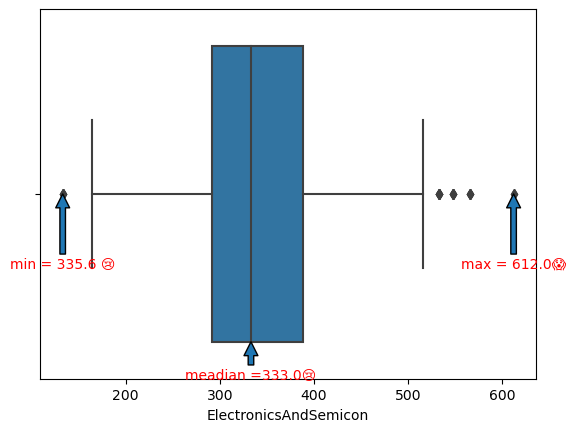

In [357]:
sns.boxplot(x =filtered_data)

# Annotate max with arrow
plt.annotate("max = 612.0😱",
             xy=(filtered_data.max(), 0.), 
             xytext=(filtered_data.max(),0.2),
             arrowprops={"width":4,"headwidth":10,'headlength':10},
             color='Red',
             fontsize=10, ha='center')


# Annotate medain with arrow
plt.annotate("meadian =333.0😢",
             xy=(filtered_data.median(), 0.4), 
             xytext=(filtered_data.median(),0.5),
             arrowprops={"width":4,"headwidth":10,'headlength':10},
             color='Red',
             fontsize=10, ha='center')

# Annotate mean with arrow
plt.annotate("min = 335.6 😢",
             xy=(filtered_data.min(), 0), 
             xytext=(filtered_data.min(),0.2),
             arrowprops={"width":4,"headwidth":10,'headlength':10},
             color='Red',
             fontsize=10, ha='center')

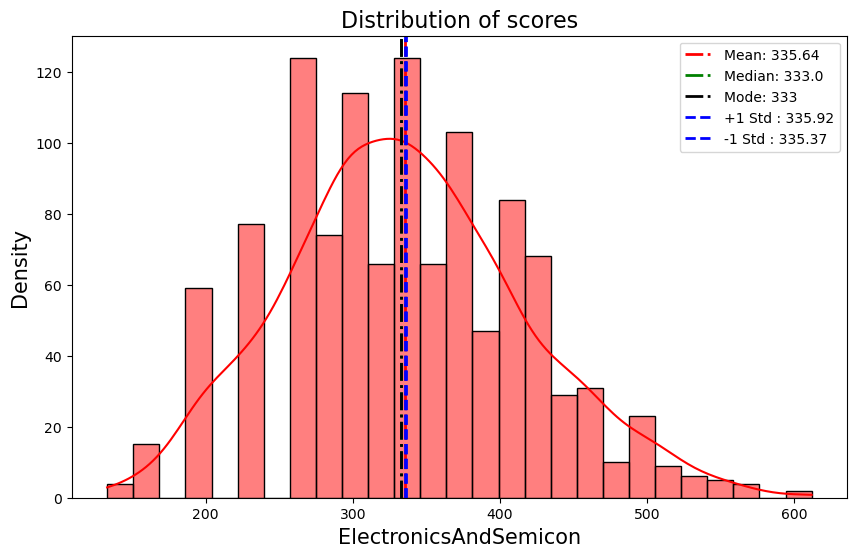

In [359]:
plt.figure(figsize=(10, 6))

sns.histplot(filtered_data, bins='auto', kde=True,color = 'red' )

# Plot vertical lines for mean, median, and mode
plt.axvline(filtered_data.mean(), color='red', linestyle='-.', linewidth=2, label=f"Mean: {round(filtered_data.mean(), 2)}")
plt.axvline(filtered_data.median(), color='green', linestyle='-.', linewidth=2, label=f"Median: {round(filtered_data.median(), 2)}")
plt.axvline(filtered_data.mode()[0], color='black', linestyle='-.', linewidth=2, label=f"Mode: {round(filtered_data.mode()[0], 2)}")

std = filter_data.std()
plt.axvline(filtered_data.mean() + std, color='blue', linestyle='--', linewidth=2, label=f"+1 Std : {round(filtered_data.mean() + std, 2)}")
plt.axvline(filtered_data.mean() - std, color='blue', linestyle='--', linewidth=2, label=f"-1 Std : {round(filtered_data.mean() - std, 2)}")

# Set labels and title
plt.xlabel('ElectronicsAndSemicon', size=15)
plt.ylabel('Density', size=15)
plt.title('Distribution of scores', size=16)

# Show legend
plt.legend()

# Show plot
plt.show()

### <span style='color:blue'>2.23 ComputerScience</span>

#### <span style='color:brown'> Cloumn cleaning on ComputerScience cloumn </span>

In [360]:
df['ComputerScience'].describe()

count    3998.000000
mean       90.742371
std       175.273083
min        -1.000000
25%        -1.000000
50%        -1.000000
75%        -1.000000
max       715.000000
Name: ComputerScience, dtype: float64

In [362]:
filtered_data = df.loc[df['ComputerScience'] != -1]['ComputerScience']

#### <span style='color:brown'> Non visual analysis on ComputerScience cloumn </span>

In [363]:
print("*"*10, "ComputerScience" , "*"*10)
print(filtered_data.agg(['count','min', 'max', 'mean', 'median', 'std','skew','kurt']))
print()

********** ComputerScience **********
count     902.000000
min       130.000000
max       715.000000
mean      405.636364
median    407.000000
std        89.960805
skew        0.366018
kurt        0.212597
Name: ComputerScience, dtype: float64



#### <span style='color:brown'> visual analysis on ComputerScience cloumn </span>

Text(130, 0.2, 'min = 715.0 😢')

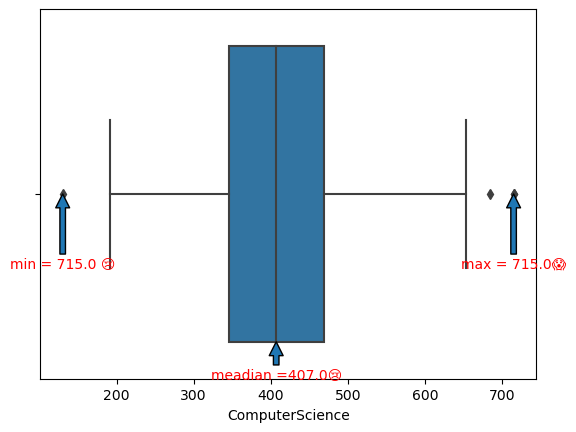

In [365]:
sns.boxplot(x =filtered_data)

# Annotate max with arrow
plt.annotate("max = 715.0😱",
             xy=(filtered_data.max(), 0.), 
             xytext=(filtered_data.max(),0.2),
             arrowprops={"width":4,"headwidth":10,'headlength':10},
             color='Red',
             fontsize=10, ha='center')


# Annotate medain with arrow
plt.annotate("meadian =407.0😢",
             xy=(filtered_data.median(), 0.4), 
             xytext=(filtered_data.median(),0.5),
             arrowprops={"width":4,"headwidth":10,'headlength':10},
             color='Red',
             fontsize=10, ha='center')

# Annotate mean with arrow
plt.annotate("min = 715.0 😢",
             xy=(filtered_data.min(), 0), 
             xytext=(filtered_data.min(),0.2),
             arrowprops={"width":4,"headwidth":10,'headlength':10},
             color='Red',
             fontsize=10, ha='center')

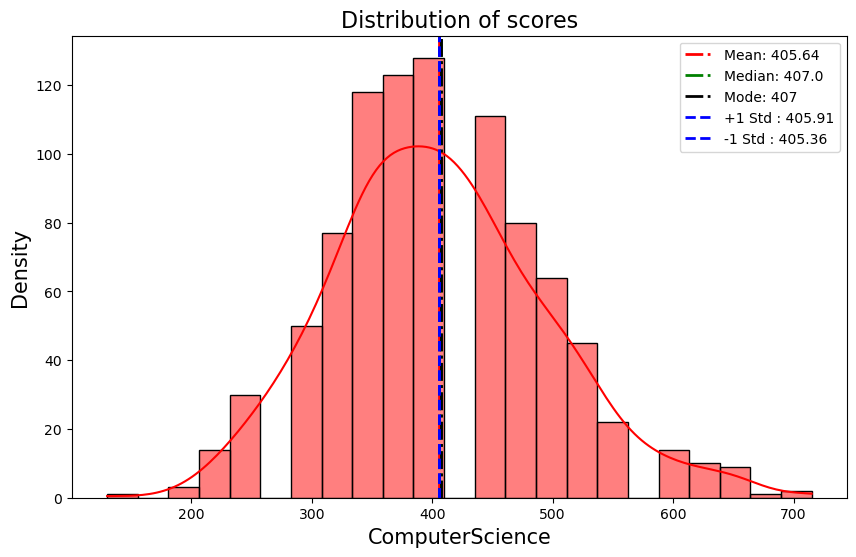

In [366]:
plt.figure(figsize=(10, 6))

sns.histplot(filtered_data, bins='auto', kde=True,color = 'red' )

# Plot vertical lines for mean, median, and mode
plt.axvline(filtered_data.mean(), color='red', linestyle='-.', linewidth=2, label=f"Mean: {round(filtered_data.mean(), 2)}")
plt.axvline(filtered_data.median(), color='green', linestyle='-.', linewidth=2, label=f"Median: {round(filtered_data.median(), 2)}")
plt.axvline(filtered_data.mode()[0], color='black', linestyle='-.', linewidth=2, label=f"Mode: {round(filtered_data.mode()[0], 2)}")

std = filter_data.std()
plt.axvline(filtered_data.mean() + std, color='blue', linestyle='--', linewidth=2, label=f"+1 Std : {round(filtered_data.mean() + std, 2)}")
plt.axvline(filtered_data.mean() - std, color='blue', linestyle='--', linewidth=2, label=f"-1 Std : {round(filtered_data.mean() - std, 2)}")

# Set labels and title
plt.xlabel('ComputerScience', size=15)
plt.ylabel('Density', size=15)
plt.title('Distribution of scores', size=16)

# Show legend
plt.legend()

# Show plot
plt.show()

### <span style='color:blue'>2.23 MechanicalEngg</span>

In [367]:
df['MechanicalEngg'].describe()

count    3998.000000
mean       22.974737
std        98.123311
min        -1.000000
25%        -1.000000
50%        -1.000000
75%        -1.000000
max       623.000000
Name: MechanicalEngg, dtype: float64

In [368]:
filtered_data = df.loc[df['MechanicalEngg'] != -1]['MechanicalEngg']

In [369]:
print("*"*10, "MechanicalEngg" , "*"*10)
print(filtered_data.agg(['count','min', 'max', 'mean', 'median', 'std','skew','kurt']))
print()

********** MechanicalEngg **********
count     235.000000
min       180.000000
max       623.000000
mean      406.876596
median    407.000000
std        84.894993
skew        0.154834
kurt        0.051448
Name: MechanicalEngg, dtype: float64



Text(180, 0.2, 'min =180.0 😢')

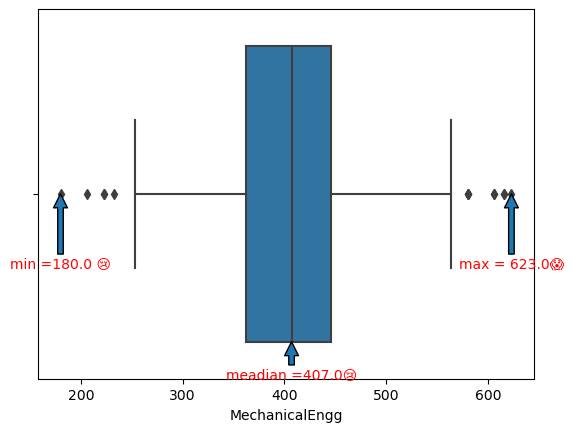

In [370]:
sns.boxplot(x =filtered_data)

# Annotate max with arrow
plt.annotate("max = 623.0😱",
             xy=(filtered_data.max(), 0.), 
             xytext=(filtered_data.max(),0.2),
             arrowprops={"width":4,"headwidth":10,'headlength':10},
             color='Red',
             fontsize=10, ha='center')


# Annotate medain with arrow
plt.annotate("meadian =407.0😢",
             xy=(filtered_data.median(), 0.4), 
             xytext=(filtered_data.median(),0.5),
             arrowprops={"width":4,"headwidth":10,'headlength':10},
             color='Red',
             fontsize=10, ha='center')

# Annotate mean with arrow
plt.annotate("min =180.0 😢",
             xy=(filtered_data.min(), 0), 
             xytext=(filtered_data.min(),0.2),
             arrowprops={"width":4,"headwidth":10,'headlength':10},
             color='Red',
             fontsize=10, ha='center')

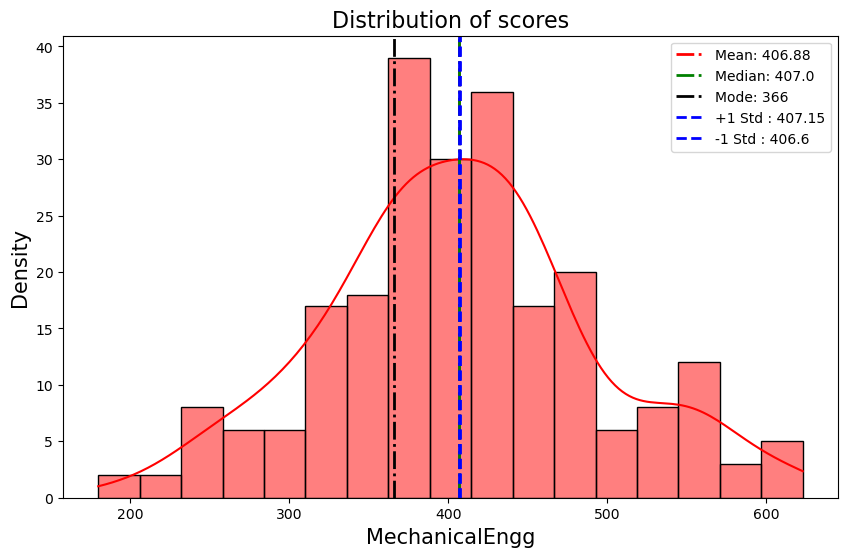

In [371]:
plt.figure(figsize=(10, 6))

sns.histplot(filtered_data, bins='auto', kde=True,color = 'red' )

# Plot vertical lines for mean, median, and mode
plt.axvline(filtered_data.mean(), color='red', linestyle='-.', linewidth=2, label=f"Mean: {round(filtered_data.mean(), 2)}")
plt.axvline(filtered_data.median(), color='green', linestyle='-.', linewidth=2, label=f"Median: {round(filtered_data.median(), 2)}")
plt.axvline(filtered_data.mode()[0], color='black', linestyle='-.', linewidth=2, label=f"Mode: {round(filtered_data.mode()[0], 2)}")

std = filter_data.std()
plt.axvline(filtered_data.mean() + std, color='blue', linestyle='--', linewidth=2, label=f"+1 Std : {round(filtered_data.mean() + std, 2)}")
plt.axvline(filtered_data.mean() - std, color='blue', linestyle='--', linewidth=2, label=f"-1 Std : {round(filtered_data.mean() - std, 2)}")

# Set labels and title
plt.xlabel('MechanicalEngg', size=15)
plt.ylabel('Density', size=15)
plt.title('Distribution of scores', size=16)

# Show legend
plt.legend()

# Show plot
plt.show()

### <span style='color:blue'>2.24 ElectricalEngg</span>

In [372]:
df['ElectricalEngg'].describe()

count    3998.000000
mean       16.478739
std        87.585634
min        -1.000000
25%        -1.000000
50%        -1.000000
75%        -1.000000
max       676.000000
Name: ElectricalEngg, dtype: float64

In [373]:
filtered_data = df.loc[df['ElectricalEngg'] != -1]['ElectricalEngg']

In [374]:
print("*"*10, "ElectricalEngg" , "*"*10)
print(filtered_data.agg(['count','min', 'max', 'mean', 'median', 'std','skew','kurt']))
print()

********** ElectricalEngg **********
count     161.000000
min       206.000000
max       676.000000
mean      433.037267
median    433.000000
std        98.515537
skew        0.170428
kurt       -0.269613
Name: ElectricalEngg, dtype: float64



Text(206, 0.2, 'min = 206.0 😢')

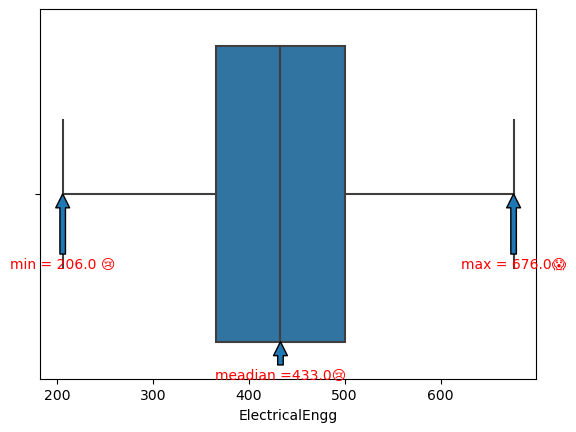

In [377]:
sns.boxplot(x =filtered_data)

# Annotate max with arrow
plt.annotate("max = 676.0😱",
             xy=(filtered_data.max(), 0.), 
             xytext=(filtered_data.max(),0.2),
             arrowprops={"width":4,"headwidth":10,'headlength':10},
             color='Red',
             fontsize=10, ha='center')


# Annotate medain with arrow
plt.annotate("meadian =433.0😢",
             xy=(filtered_data.median(), 0.4), 
             xytext=(filtered_data.median(),0.5),
             arrowprops={"width":4,"headwidth":10,'headlength':10},
             color='Red',
             fontsize=10, ha='center')

# Annotate mean with arrow
plt.annotate("min = 206.0 😢",
             xy=(filtered_data.min(), 0), 
             xytext=(filtered_data.min(),0.2),
             arrowprops={"width":4,"headwidth":10,'headlength':10},
             color='Red',
             fontsize=10, ha='center')

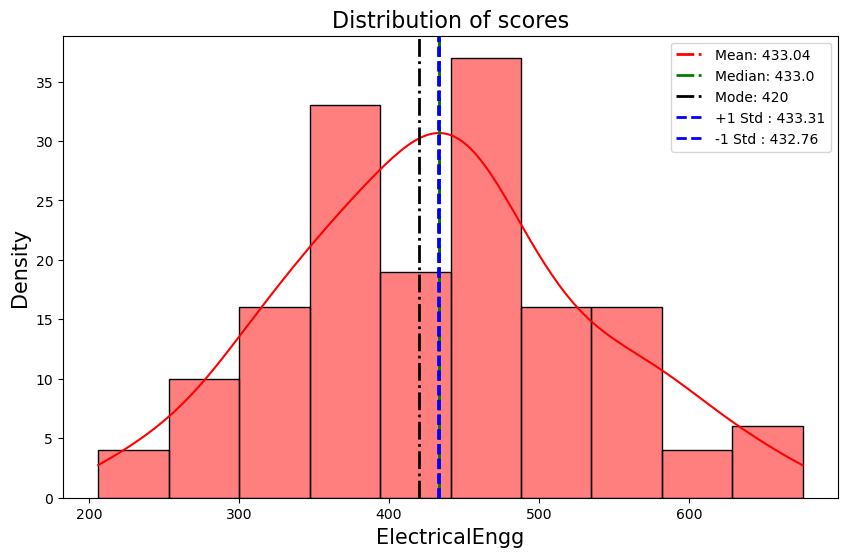

In [378]:
plt.figure(figsize=(10, 6))

sns.histplot(filtered_data, bins='auto', kde=True,color = 'red' )

# Plot vertical lines for mean, median, and mode
plt.axvline(filtered_data.mean(), color='red', linestyle='-.', linewidth=2, label=f"Mean: {round(filtered_data.mean(), 2)}")
plt.axvline(filtered_data.median(), color='green', linestyle='-.', linewidth=2, label=f"Median: {round(filtered_data.median(), 2)}")
plt.axvline(filtered_data.mode()[0], color='black', linestyle='-.', linewidth=2, label=f"Mode: {round(filtered_data.mode()[0], 2)}")

std = filter_data.std()
plt.axvline(filtered_data.mean() + std, color='blue', linestyle='--', linewidth=2, label=f"+1 Std : {round(filtered_data.mean() + std, 2)}")
plt.axvline(filtered_data.mean() - std, color='blue', linestyle='--', linewidth=2, label=f"-1 Std : {round(filtered_data.mean() - std, 2)}")

# Set labels and title
plt.xlabel('ElectricalEngg', size=15)
plt.ylabel('Density', size=15)
plt.title('Distribution of scores', size=16)

# Show legend
plt.legend()

# Show plot
plt.show()

### <span style='color:blue'>2.24 TelecomEngg</span>

In [379]:
df['TelecomEngg'].describe()

count    3998.000000
mean       31.851176
std       104.852845
min        -1.000000
25%        -1.000000
50%        -1.000000
75%        -1.000000
max       548.000000
Name: TelecomEngg, dtype: float64

In [380]:
filtered_data = df.loc[df['TelecomEngg'] != -1]['TelecomEngg']

In [381]:
print("*"*10, "TelecomEngg" , "*"*10)
print(filtered_data.agg(['count','min', 'max', 'mean', 'median', 'std','skew','kurt']))
print()

********** TelecomEngg **********
count     374.000000
min       153.000000
max       548.000000
mean      350.173797
median    356.000000
std        75.661864
skew        0.197276
kurt       -0.282071
Name: TelecomEngg, dtype: float64



Text(153, 0.2, 'min = 153.0 😢')

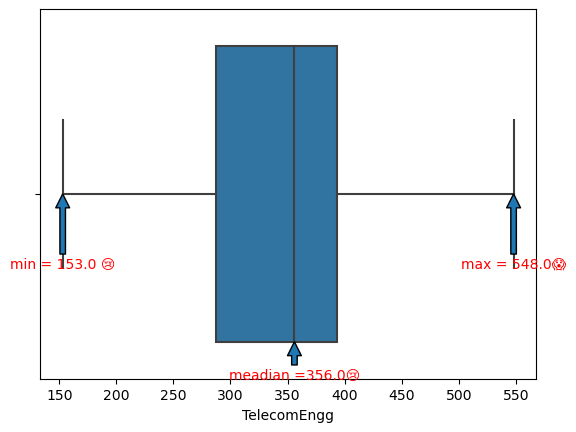

In [382]:
sns.boxplot(x =filtered_data)

# Annotate max with arrow
plt.annotate("max = 548.0😱",
             xy=(filtered_data.max(), 0.), 
             xytext=(filtered_data.max(),0.2),
             arrowprops={"width":4,"headwidth":10,'headlength':10},
             color='Red',
             fontsize=10, ha='center')


# Annotate medain with arrow
plt.annotate("meadian =356.0😢",
             xy=(filtered_data.median(), 0.4), 
             xytext=(filtered_data.median(),0.5),
             arrowprops={"width":4,"headwidth":10,'headlength':10},
             color='Red',
             fontsize=10, ha='center')

# Annotate mean with arrow
plt.annotate("min = 153.0 😢",
             xy=(filtered_data.min(), 0), 
             xytext=(filtered_data.min(),0.2),
             arrowprops={"width":4,"headwidth":10,'headlength':10},
             color='Red',
             fontsize=10, ha='center')

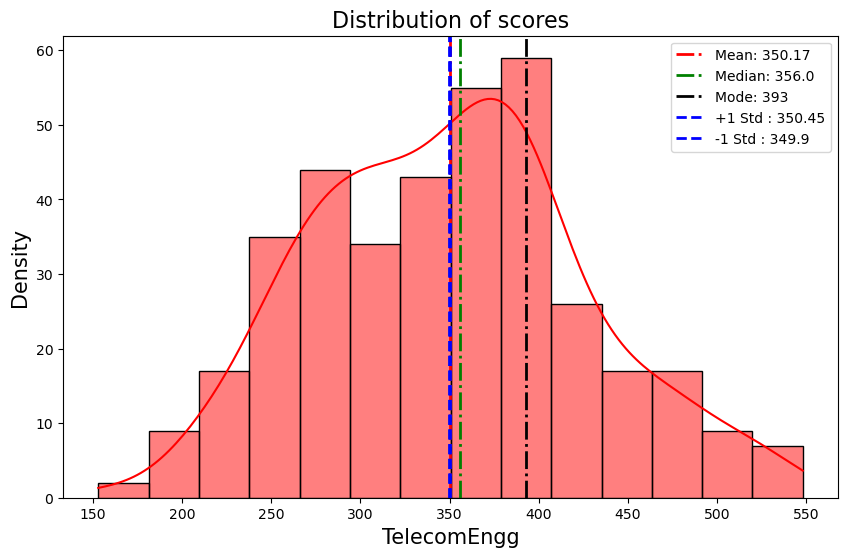

In [383]:
plt.figure(figsize=(10, 6))

sns.histplot(filtered_data, bins='auto', kde=True,color = 'red' )

# Plot vertical lines for mean, median, and mode
plt.axvline(filtered_data.mean(), color='red', linestyle='-.', linewidth=2, label=f"Mean: {round(filtered_data.mean(), 2)}")
plt.axvline(filtered_data.median(), color='green', linestyle='-.', linewidth=2, label=f"Median: {round(filtered_data.median(), 2)}")
plt.axvline(filtered_data.mode()[0], color='black', linestyle='-.', linewidth=2, label=f"Mode: {round(filtered_data.mode()[0], 2)}")

std = filter_data.std()
plt.axvline(filtered_data.mean() + std, color='blue', linestyle='--', linewidth=2, label=f"+1 Std : {round(filtered_data.mean() + std, 2)}")
plt.axvline(filtered_data.mean() - std, color='blue', linestyle='--', linewidth=2, label=f"-1 Std : {round(filtered_data.mean() - std, 2)}")

# Set labels and title
plt.xlabel('TelecomEngg', size=15)
plt.ylabel('Density', size=15)
plt.title('Distribution of scores', size=16)

# Show legend
plt.legend()

# Show plot
plt.show()

### <span style='color:blue'>2.25 CivilEngg</span>

In [384]:
df['CivilEngg'].describe()

count    3998.000000
mean        2.683842
std        36.658505
min        -1.000000
25%        -1.000000
50%        -1.000000
75%        -1.000000
max       516.000000
Name: CivilEngg, dtype: float64

In [385]:
filtered_data = df.loc[df['CivilEngg'] != -1]['CivilEngg']

In [386]:
print("*"*10, "CivilEngg" , "*"*10)
print(filtered_data.agg(['count','min', 'max', 'mean', 'median', 'std','skew','kurt']))
print()

********** CivilEngg **********
count      42.000000
min       166.000000
max       516.000000
mean      349.666667
median    348.000000
std        79.784670
skew        0.208857
kurt       -0.128203
Name: CivilEngg, dtype: float64



Text(166, 0.2, 'min = 166.0 😢')

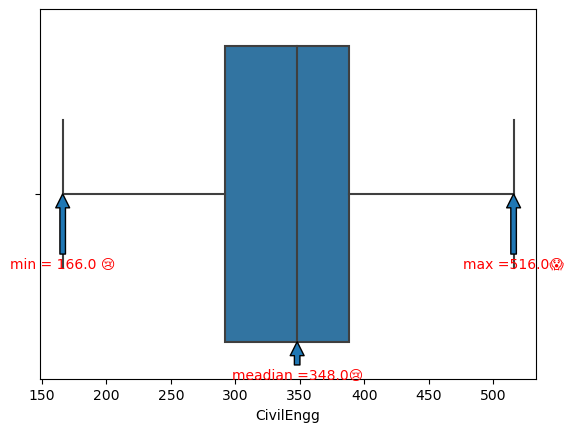

In [387]:
sns.boxplot(x =filtered_data)

# Annotate max with arrow
plt.annotate("max =516.0😱",
             xy=(filtered_data.max(), 0.), 
             xytext=(filtered_data.max(),0.2),
             arrowprops={"width":4,"headwidth":10,'headlength':10},
             color='Red',
             fontsize=10, ha='center')


# Annotate medain with arrow
plt.annotate("meadian =348.0😢",
             xy=(filtered_data.median(), 0.4), 
             xytext=(filtered_data.median(),0.5),
             arrowprops={"width":4,"headwidth":10,'headlength':10},
             color='Red',
             fontsize=10, ha='center')

# Annotate mean with arrow
plt.annotate("min = 166.0 😢",
             xy=(filtered_data.min(), 0), 
             xytext=(filtered_data.min(),0.2),
             arrowprops={"width":4,"headwidth":10,'headlength':10},
             color='Red',
             fontsize=10, ha='center')

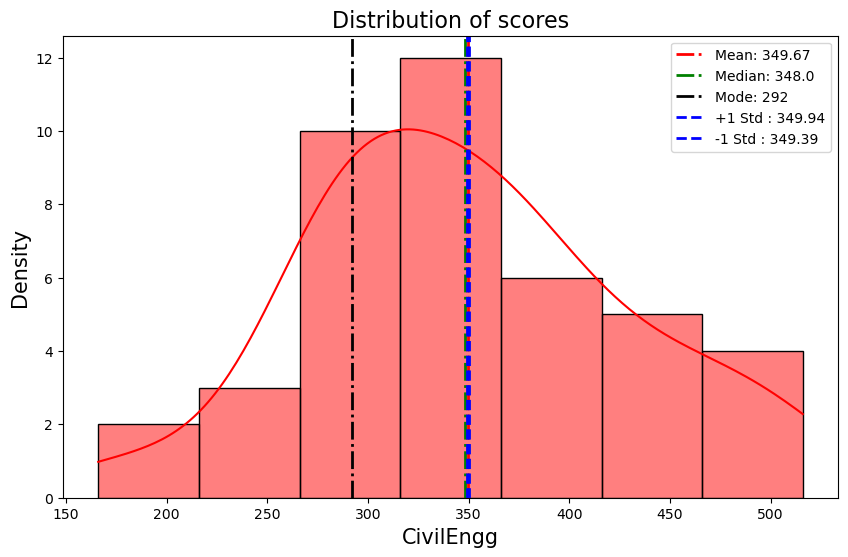

In [388]:
plt.figure(figsize=(10, 6))

sns.histplot(filtered_data, bins='auto', kde=True,color = 'red' )

# Plot vertical lines for mean, median, and mode
plt.axvline(filtered_data.mean(), color='red', linestyle='-.', linewidth=2, label=f"Mean: {round(filtered_data.mean(), 2)}")
plt.axvline(filtered_data.median(), color='green', linestyle='-.', linewidth=2, label=f"Median: {round(filtered_data.median(), 2)}")
plt.axvline(filtered_data.mode()[0], color='black', linestyle='-.', linewidth=2, label=f"Mode: {round(filtered_data.mode()[0], 2)}")

std = filter_data.std()
plt.axvline(filtered_data.mean() + std, color='blue', linestyle='--', linewidth=2, label=f"+1 Std : {round(filtered_data.mean() + std, 2)}")
plt.axvline(filtered_data.mean() - std, color='blue', linestyle='--', linewidth=2, label=f"-1 Std : {round(filtered_data.mean() - std, 2)}")

# Set labels and title
plt.xlabel('CivilEngg', size=15)
plt.ylabel('Density', size=15)
plt.title('Distribution of scores', size=16)

# Show legend
plt.legend()

# Show plot
plt.show()

## 3. BIVARIATE ANALYSIS

### Gender vs Salary 

<Axes: xlabel='Salary', ylabel='Gender'>

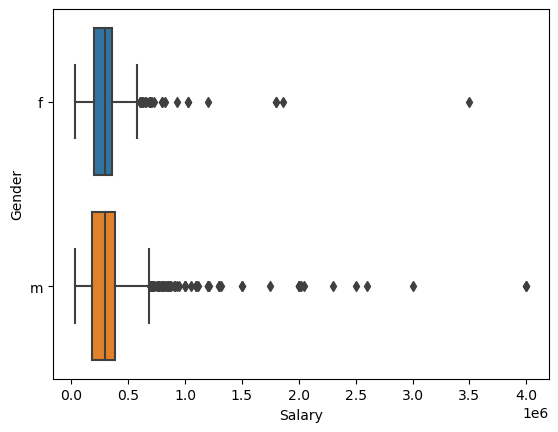

In [282]:
sns.boxplot(x='Salary',y='Gender',data=df)

- It is noted that there are many outliers in the salary data
- There is not much difference between median salary for both genders.
- We can also observe male have more outliers indicating they are more people getting higher pays in male than female category

### Specialization vs Salary

Text(0.5, 0.98, 'Salary vs Specialization')

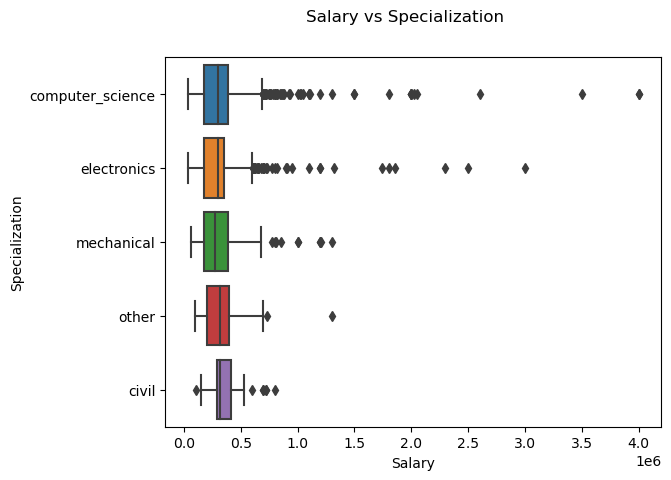

In [284]:
sns.boxplot(x='Salary',y='Specialization',data=df)
plt.suptitle('Salary vs Specialization')

- Median salary of people from all specializations are nearly similar.
- We can see there are more people getting higher pays who have specialization in Computer_science/electronics compared to others.

### Desugnation with Gender

In [292]:
popular_Designation = df['Designation'].value_counts()[:20].index.tolist()
print(popular_Designation)

['software engineer', 'software developer', 'system engineer', 'programmer analyst', 'systems engineer', 'java software engineer', 'software test engineer', 'project engineer', 'technical support engineer', 'senior software engineer', 'java developer', 'test engineer', 'web developer', 'assistant manager', 'application developer', 'associate software engineer', 'network engineer', 'data analyst', 'business analyst', 'engineer']


In [299]:
top_Designations = df[df['Designation'].isin(popular_Designation)]
top_Designations.head()

,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
1,500000,2013-09-01,2015-12-31,assistant manager,indore,m,1989-10-04,85.40,cbse,2007,85.0,cbse,2,B.Tech/B.E.,electronics,70.06,5807,0,Madhya Pradesh,2012,695,610,780,0.960603,-1,466,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.1076,0.8637
2,325000,2014-06-01,2015-12-31,systems engineer,chennai,f,1992-08-03,85.00,cbse,2010,68.2,cbse,2,B.Tech/B.E.,computer_science,70.00,64,0,Uttar Pradesh,2014,615,545,370,0.450877,395,-1,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.8682,0.6721
3,1100000,2011-07-01,2015-12-31,senior software engineer,gurgaon,m,1989-12-05,85.60,cbse,2007,83.6,cbse,1,B.Tech/B.E.,computer_science,74.64,6920,1,Delhi,2011,635,585,625,0.974396,615,-1,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.4078,-0.9194
5,300000,2014-06-01,2015-12-31,system engineer,hyderabad,m,1992-07-02,89.92,state,2010,87.0,state,2,B.Tech/B.E.,electronics,76.32,5086,0,Karnataka,2014,560,555,620,-1.000000,645,-1,407,-1,-1,-1,-1,-0.3027,-0.6201,-2.2954,-0.7415,-0.8608
6,300000,2014-08-01,2015-05-01,java software engineer,bangalore,m,1993-02-01,86.08,state,2010,67.5,state,2,B.Tech/B.E.,computer_science,72.98,314,1,Karnataka,2014,590,435,380,0.356536,405,-1,346,-1,-1,-1,-1,1.7081,-0.1054,-1.0379,-2.0092,-1.0872


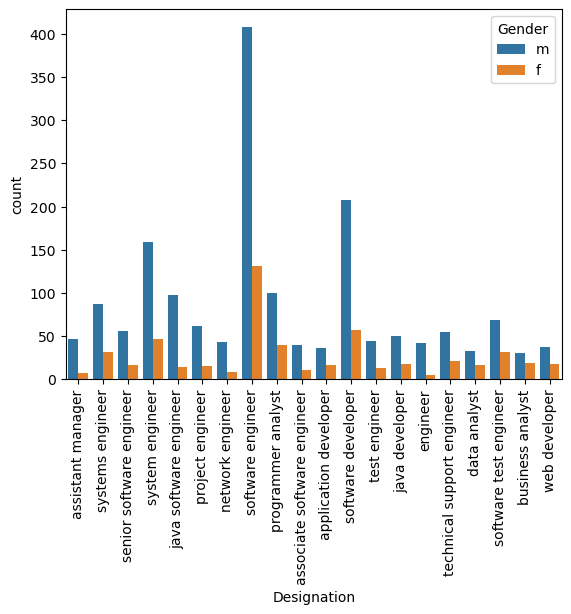

In [298]:
sns.countplot(x='Designation',hue='Gender',data=top_Designations)
plt.xticks(rotation=90)
plt.show()

- All the general professions are more dominated by the males as we can there is considerable difference of frequency for every role.
- Here we took the most common roles taken by the amcat aspirants which are mostly 'IT Roles'.
- from the below plot,we can understand the reason for most 'IT roles' might be because of Specialization.

### Designation vs Salary with Gender

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'assistant manager'),
  Text(1, 0, 'systems engineer'),
  Text(2, 0, 'senior software engineer'),
  Text(3, 0, 'system engineer'),
  Text(4, 0, 'java software engineer'),
  Text(5, 0, 'project engineer'),
  Text(6, 0, 'network engineer'),
  Text(7, 0, 'software engineer'),
  Text(8, 0, 'programmer analyst'),
  Text(9, 0, 'associate software engineer'),
  Text(10, 0, 'application developer'),
  Text(11, 0, 'software developer'),
  Text(12, 0, 'test engineer'),
  Text(13, 0, 'java developer'),
  Text(14, 0, 'engineer'),
  Text(15, 0, 'technical support engineer'),
  Text(16, 0, 'data analyst'),
  Text(17, 0, 'software test engineer'),
  Text(18, 0, 'business analyst'),
  Text(19, 0, 'web developer')])

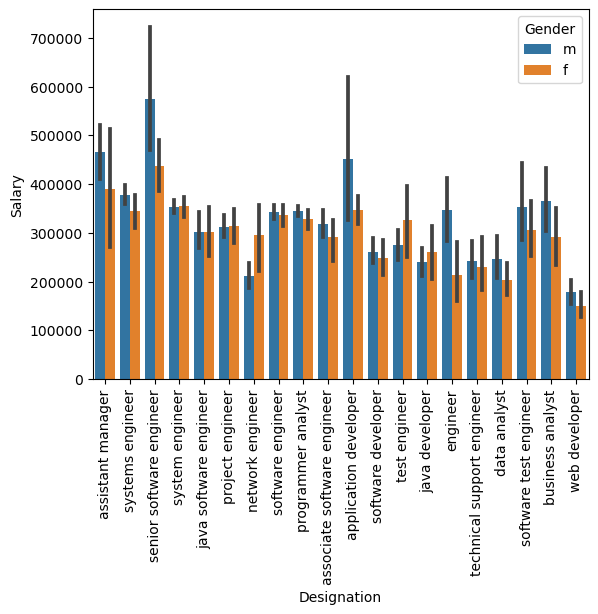

In [301]:
sns.barplot(x='Designation',y='Salary',hue='Gender',data=top_Designations)
plt.xticks(rotation=90)

- mean salary of top most frequent roles is nearly independent of gender.
- there is some considerable difference in some roles.but we cannot be sure that women is being paid less in that role
- it might be due to experience,specialization etc.

### Period vs Salary

In [303]:
df['Period'] = df["DOL"].dt.year - df['DOJ'].dt.year

<Axes: xlabel='Period', ylabel='Salary'>

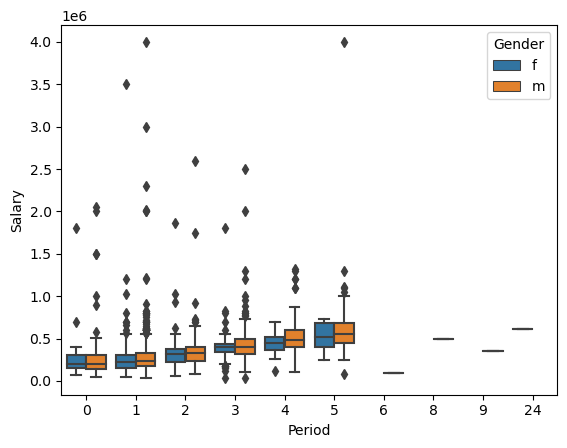

In [309]:
sns.boxplot(data=df,x='Period',y='Salary',hue='Gender')

- Median salary of both males and females have increased slightly with exp for first five years
and Decreased suddenly on the 6th year and then same pattern for the following years.
- We can see that men and women having same experience are paid nearly equally around 3.5-5 lakhs

### CollegeGPA vs Salary with gender

<Axes: xlabel='collegeGPA', ylabel='Salary'>

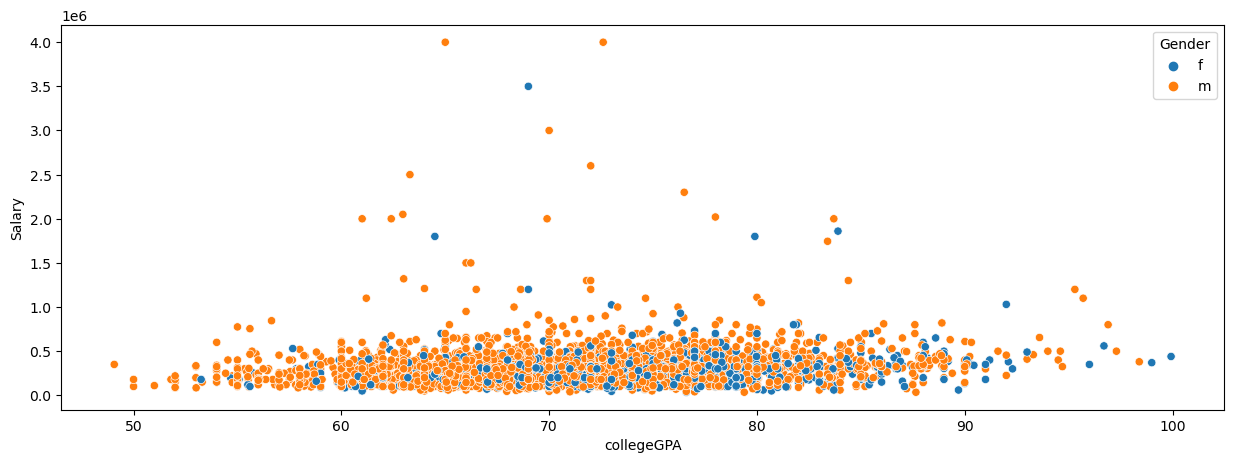

In [325]:
plt.figure(figsize=(15,5))
sns.scatterplot(data = df, x='collegeGPA',y='Salary',hue='Gender')

### Specialization vs Salary

<Axes: xlabel='Specialization', ylabel='Salary'>

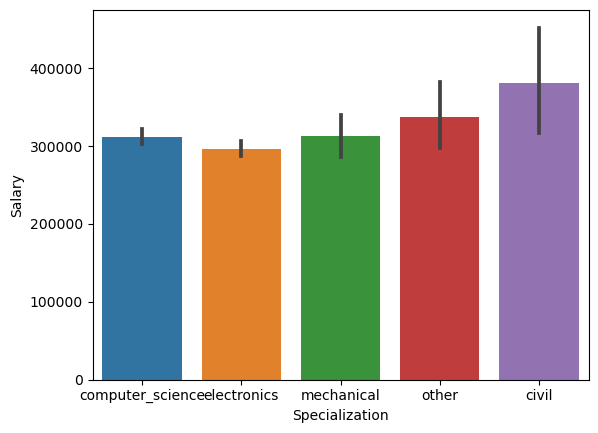

In [317]:
sns.barplot(data=df,x='Specialization',y='Salary')

- Aspirants from CE Branch earns the highest average pay
- All the other branches earn nearly similar average pay

## Specialization vs Salary with gender

<Axes: xlabel='Specialization', ylabel='Salary'>

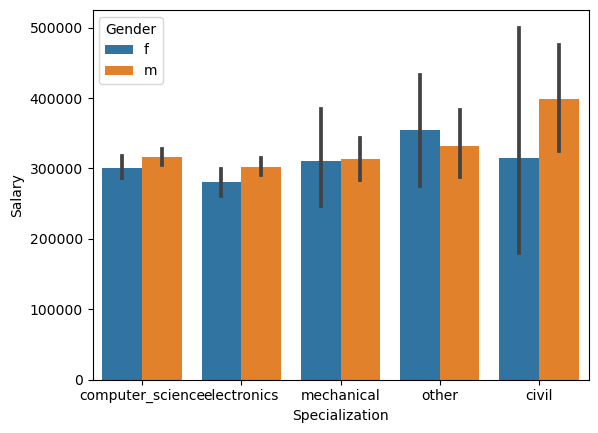

In [320]:
sns.barplot(data=df,x='Specialization',y='Salary',hue='Gender')

- Men from Computer_science,Eelectronics,CE Earn slightly greater than women from this specialization.
- Women from the other specialization Earns way more than men from same specialization

### Scores vs Salary

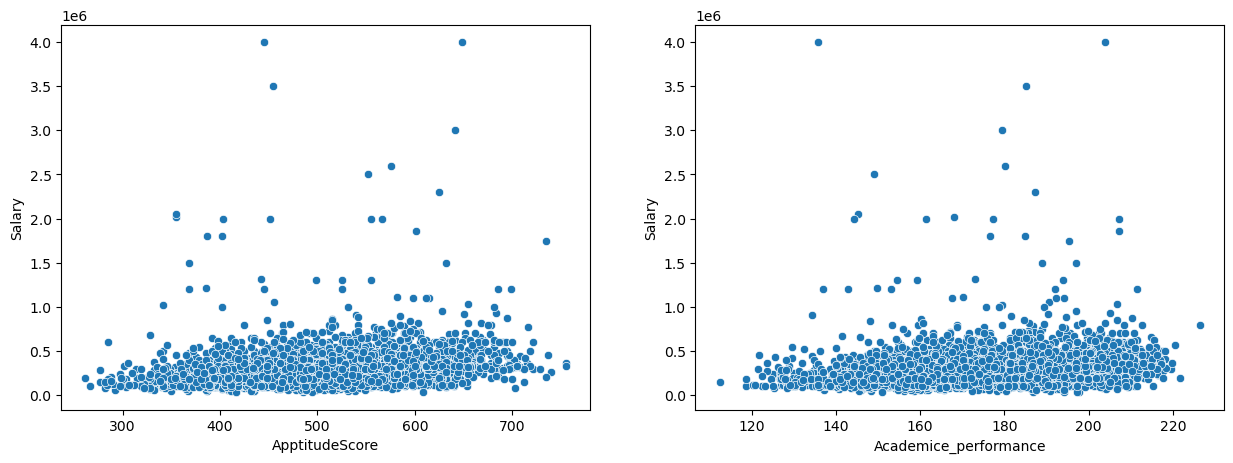

In [324]:
plt.figure(figsize=(15,5))
df['ApptitudeScore']=(df['Logical']+df['Quant']+df['English'])/3
df['Academice_performance']=df['10percentage']+df['12percentage']+df['collegeGPA']/3
plt.subplot(1,2,1)
sns.scatterplot(x='ApptitudeScore',y='Salary',data=df)
plt.subplot(1,2,2)
sns.scatterplot(x='Academice_performance',y='Salary',data=df)
plt.show()


- We can see there is some positive correlation of salary with both the ApptitudeScore and Academice_performance.

## CLAIMS

##### 1. Times of India article dated Jan 18, 2019 states that “After doing your Computer Science Engineering if you take up jobs as a Programming Analyst, Software Engineer, Hardware Engineer and Associate Engineer you can earn up to 2.5-3 lakhs as a fresh graduate.” Test this claim with the data given to you.


- Null Hypothesis (H0): The claim is true, and the observed frequencies of job titles (Programming Analyst, Software Engineer, Hardware Engineer, Associate Engineer) match the expected frequencies stated in the claim.
- Alternative Hypothesis (H1): The claim is not true, and the observed frequencies of job titles differ significantly from the expected frequencies stated in the claim.

In [401]:
claim_df=df[(df["Designation"].isin(["programmer analyst","software engineer","hardware engineer","associate engineer"])) & (df["Period"]==0) & (df['Specialization'] == 'computer_science')]

In [442]:
from scipy import stats as st

pv = st.ttest_1samp(claim_df['Salary'],popmean=260000)[1]
print(pv, claim_df['Salary'].mean())
### for a 95% confidence interval,my p- value should be >0.05 to claim the null hypothesis
if pv < 0.05:
    print('We reject the null hypothesis and Average salary is not equal to 250k -300k')
else:
    print('We fail to reject null hypothesis and Avergae salary is equal to 250k - 300k')

0.06655416836296062 339166.6666666667
We fail to reject null hypothesis and Avergae salary is equal to 250k - 300k


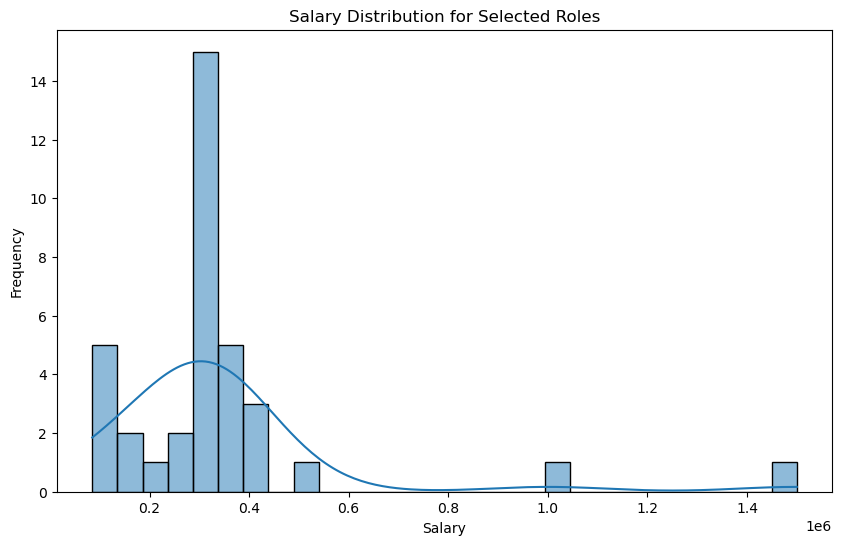

In [443]:
plt.figure(figsize=(10,6))
sns.histplot(data=claim_df, x="Salary", kde=True)
plt.title('Salary Distribution for Selected Roles')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

### CONCLUSIONS

- 1. Most of Amcat Aspirants are male working in IT domain with an experience of around 5years with degree in Btech and specialization in Computer Science/Information Technology from tier-2 college in uttarpradesh with an average salary around 300k.
- 2.Highpaying jobs taken up by amcat aspirants are mostly from 'IT' Domain.
- 3.Software Engineer and Software Developer are the most aimed profession for amcat aspirants.